# *Introduction:*

This project is designed to provide a taste of how EDA can be applied in a real-world business environment. You'll also develop a foundational understanding of risk analytics in banking and financial services, learning how data can be leveraged to reduce financial losses when issuing loans to clients.


## *Business Understanding:*


The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

- The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

- All other cases: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

- **Approved:** The Company has approved loan Application

- **Cancelled:** The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

- **Refused:** The company had rejected the loan (because the client does not meet their requirements etc.).

- **Unused offer:** Loan has been cancelled by the client but on different stages of the process.

In this project, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

## *Business Objectives:*

This project aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

## *Data Understanding*

This dataset has 3 files as explained below:

- 'application_data.csv' contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.

- 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

- 'columns_description.csv' is data dictionary which describes the meaning of the variables.

## *Results Expected by Learners*

- Present the overall approach of the analysis in a presentation. Mention the problem statement and the analysis approach briefly.

- Identify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)

**Hint:** Note that in EDA, since it is not necessary to replace the missing value, but if you have to replace the missing value, what should be the approach. Clearly mention the approach.

- Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points.

- Identify if there is data imbalance in the data. Find the ratio of data imbalance.

**Hint**: How will you analyse the data in case of data imbalance? You can plot more than one type of plot to analyse the different aspects due to data imbalance. For example, you can choose your own scale for the graphs, i.e. one can plot in terms of percentage or absolute value. Do this analysis for the **‘Target variable’** in the dataset ( clients with payment difficulties and all other cases). Use a mix of univariate and bivariate analysis etc.

**Hint:** Since there are a lot of columns, you can run your analysis in loops for the appropriate columns and find the insights.

- Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.

- Find the top 10 correlation for the **Client with payment difficulties and all other cases (Target variable).** Note that you have to find the top correlation by segmenting the data frame w.r.t to the target variable and then find the top correlation for each of the segmented data and find if any insight is there. Say, there are 5+1(target) variables in a dataset: Var1, Var2, Var3, Var4, Var5, Target. And if you have to find top 3 correlation, it can be: **Var1 & Var2, Var2 & Var3, Var1 & Var3.** Target variable will not feature in this correlation as it is a categorical variable and not a continuous variable which is increasing or decreasing.

- Include visualisations and summarise the most important results in the presentation. You are free to choose the graphs which explain the numerical/categorical variables. Insights should explain why the variable is important for differentiating the clients with payment difficulties with all other cases.

You need to submit one/two Ipython notebook which clearly explains the thought process behind your analysis (either in comments of markdown text), code and relevant plots. The presentation file needs to be in PDF format and should contain the points discussed above with the necessary visualisations. Also, all the visualisations and plots must be done in Python(should be present in the Ipython notebook), though they may be recreated in Tableau for better aesthetics in the PPT file.

In [173]:
# Importing libraries like numpy, pandas, matlplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# %matplotlib inline Displays plots inside the Jupyter Notebook.Without this, plots might open in a separate window.

In [2]:
#Ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Arranging to display all rows and columns to have visibility on data set

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

## **Dataset1 : 'application_data.csv'**

### 1. Reading and Understanding the data
1.1 Importing Dataset

In [4]:
# Importing 'application_data.csv' dataset

inp_appl = pd.read_csv('application_data.csv')

In [5]:
# Checking the rows and columns of raw dataset
inp_appl.shape

(307511, 122)

In [174]:
# Print the head of the data frame

inp_appl.head(8)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL OCCUPATION_TYPE CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_RANGE AMT_CREDIT_RANGE AMT_GOODS_PRICE_RANGE  AGE_IN_YEARS AGE_GROUP  YEAR_EMPLOYED EMPLOYEMENT_YEARS
0      100002       1         Cash loans           M               Y            0             2.025    4.065975      24700.5            3.510    Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801        9461            637             3648.0             2120           1        Laborers             1.0                    2                           2                  WEDNESDAY                       10                           0                          0                           0                      0                      0                       0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                  1134.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0            2L-3L            4L-5L                 3L-4L         25.92     25-30           1.75               0-5
1      100003       0         Cash loans           F               N            0             2.700   12.935025      35698.5           11.295           Family         State servant               Higher education               Married  House / apartment                    0.003541       16765           1188             1186.0              291           1      Core staff             2.0                    1                           1                     MONDAY                       11                           0                          0                           0                      0                      0                       0                  School                       1.0                       0.0                       1.0                       0.0                   828.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0            2L-3L        Above 10L             Above 10L         45.93     45-50           3.25               0-5
2      100004       0    Revolving loans           M               Y            0             0.675    1.350000       6750.0            1.350    Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032       19046            225             4260.0             2531           1        Laborers             1.0                    2                           2                     MONDAY                        9                           0                          0                           0                      0                      0                       0              Government                       0.0                       0.0                   

In [175]:
# Print the tail of the data frame
inp_appl.tail()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL OCCUPATION_TYPE CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_RANGE AMT_CREDIT_RANGE AMT_GOODS_PRICE_RANGE  AGE_IN_YEARS AGE_GROUP  YEAR_EMPLOYED EMPLOYEMENT_YEARS
307506      456251       0         Cash loans           M               N            0             1.575     2.54700      27558.0            2.250   Unaccompanied               Working  Secondary / secondary special          Separated       With parents                    0.032561        9327            236             8456.0             1982           1     Sales staff             1.0                    1                           1                   THURSDAY                       15                           0                          0                           0                      0                      0                       0                Services                       0.0                       0.0                       0.0                       0.0                   273.0                0                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0            1L-2L            2L-3L                 2L-3L         25.55     25-30           0.65               0-5
307507      456252       0         Cash loans           F               Y            0             0.720     2.69550      12001.5            2.250   Unaccompanied             Pensioner  Secondary / secondary special              Widow  House / apartment                    0.025164       20775         365243             4388.0             4090           1         Unknown             1.0                    2                           2                     MONDAY                        8                           0                          0                           0                      0                      0                       0                     XNA                       0.0                       0.0                       0.0                       0.0                     0.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0             0-1L            2L-3L                 2L-3L         56.92     55-60        1000.67               NaN
307508      456253       0         Cash loans           F               Y            0             1.530     6.77664      29979.0            5.850   Unaccompanied               Working               Higher education          Separated  House / apartment                    0.005002       14966           7921             6737.0             5150           1        Managers             1.0                    3                           3                   THURSDAY                        9                           0                          0                           0                      0                      1                       1                  School                       6.0                       0.0                    

In [176]:
# Checking data of dataset
inp_appl.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_REALTY              307511 non-null  category
 5   CNT_CHILDREN                 307511 non-null  category
 6   AMT_INCOME_TOTAL             307511 non-null  float64 
 7   AMT_CREDIT                   307511 non-null  float64 
 8   AMT_ANNUITY                  307499 non-null  float64 
 9   AMT_GOODS_PRICE              307233 non-null  float64 
 10  NAME_TYPE_SUITE              306219 non-null  category
 11  NAME_INCOME_TYPE             307511 non-null  category
 12  NAME_EDUCATION_TYPE          307511 non-null

In [9]:
# Check the summary for the numeric columns 
inp_appl.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  104582.000000  307511.000000   307511.000000    307511.000000     307511.000000  307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000  134133.000000  3.068510e+05  246546.000000    151450.00000     127568.000000                157504.000000    103023.000000    92646.000000  143620.000000  152683.000000  154491.000000   98869.000000  124921.000000          97312.000000   153161.000000             93997.000000      137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   152683.000000   154491.000000    98869.000000  124921.000000           97312.000000    153161.000000              93997.000000       137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   152683.000000   154491.000000    98869.000000  124921.000000           97312.000000    153161.000000              93997.000000       137829.000000   159080.000000             306490.000000             306490.000000             306490.000000             306490.000000           307510.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000      307511.00000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000               265992.000000              265992.00000

In [177]:
# Check null value in dataset
inp_appl.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
OCCUPATION_TYPE                    0
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
R

In [11]:
inp_appl.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object', length=122)

## **Findings**
- There are 122 columns and 307511 rows.
- A few columns in days have positive and negative values that need to be rectified.
- Standardisation is needed for a few columns that are beginning AMT.
- A null value in the dataset needs to be repaired.


## 2. Data Cleaning and Manipulation

### 2.1 Null Values

Finding null values percentage

In [12]:
# Creating Function to find null value for dataframe
def null_values(df):
    return round((df.isnull().sum()*100/len(df)).sort_values(ascending = False),2)

In [13]:
null_values(inp_appl)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

## 2.1.1 Dealing with Null values more than 50 %

In [14]:
# Creating a variable null for storing null columns having null values more than 50%

null = null_values(inp_appl)[null_values(inp_appl)>50]

In [15]:
# Checking Null_col_50 values
print(null)

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAPARTMENTS_MEDI    69.43
FONDKAPREMONT_MODE          68.39
LIVINGAPARTMENTS_MODE       68.35
LIVINGAPARTMENTS_AVG        68.35
LIVINGAPARTMENTS_MEDI       68.35
FLOORSMIN_AVG               67.85
FLOORSMIN_MODE              67.85
FLOORSMIN_MEDI              67.85
YEARS_BUILD_MEDI            66.50
YEARS_BUILD_MODE            66.50
YEARS_BUILD_AVG             66.50
OWN_CAR_AGE                 65.99
LANDAREA_MEDI               59.38
LANDAREA_MODE               59.38
LANDAREA_AVG                59.38
BASEMENTAREA_MEDI           58.52
BASEMENTAREA_AVG            58.52
BASEMENTAREA_MODE           58.52
EXT_SOURCE_1                56.38
NONLIVINGAREA_MODE          55.18
NONLIVINGAREA_AVG           55.18
NONLIVINGAREA_MEDI          55.18
ELEVATORS_MEDI              53.30
ELEVATORS_AVG               53.30
ELEVATORS_MODE

In [16]:
# Checking number of null_col_50 columns
print("Number of columns : ", null.count())

Number of columns :  41


In [17]:
type(null)

pandas.core.series.Series

In [18]:
# Checking all columns of null_col_50

null.index

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE'], dtype='object')

In [19]:
# Drop all columns which is having missing value more than 50% (41 Columns)
inp_appl.drop(columns=[col for col in null.index if col in inp_appl.columns], inplace=True)

In [178]:
# Checking number of rows and columns after dropping 41 columns
inp_appl.shape

(307511, 53)

- Now 81 columns left from dataset

## 2.1.2 Dealing with null values more than 40%

In [21]:
# Checking Null values more than 40%
null_1 = null_values(inp_appl)[null_values(inp_appl)>40]

In [22]:
null_1

FLOORSMAX_AVG                   49.76
FLOORSMAX_MODE                  49.76
FLOORSMAX_MEDI                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
dtype: float64

In [23]:
# Checking length of columns
print("Number of columns : ", len(null_1))

Number of columns :  8


In [24]:
# Check null columns more than 40 %
null_1.index

Index(['FLOORSMAX_AVG', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE'], dtype='object')

In [25]:
# Drop unnecessary columns from the datafame
inp_appl.drop(columns=[col for col in null_1.index if col in inp_appl.columns], inplace=True)

In [179]:
# Check shape of dataframe
inp_appl.shape

(307511, 53)

In [27]:
type(inp_appl)

pandas.core.frame.DataFrame

- Dropped 8 columns, Left with 73 columns

In [28]:
null_values(inp_appl).head(20)

OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
NAME_TYPE_SUITE                0.42
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
AMT_ANNUITY                    0.00
CNT_FAM_MEMBERS                0.00
DAYS_LAST_PHONE_CHANGE         0.00
FLAG_DOCUMENT_17               0.00
FLAG_DOCUMENT_18               0.00
dtype: float64

##  2.2 Analyse & Removing Unneccssary Columns

Checking with EXT_SOURCE_3 , EXT_SOURCE_2 We know that these are normalised values. We need to understand relationship b/w EXT_SOURCE_3 , EXT_SOURCE_2 with TARGET using Heatmap.

In [29]:
# Store irrevlent columns to variable called irv

irv = ["EXT_SOURCE_3","EXT_SOURCE_2"]

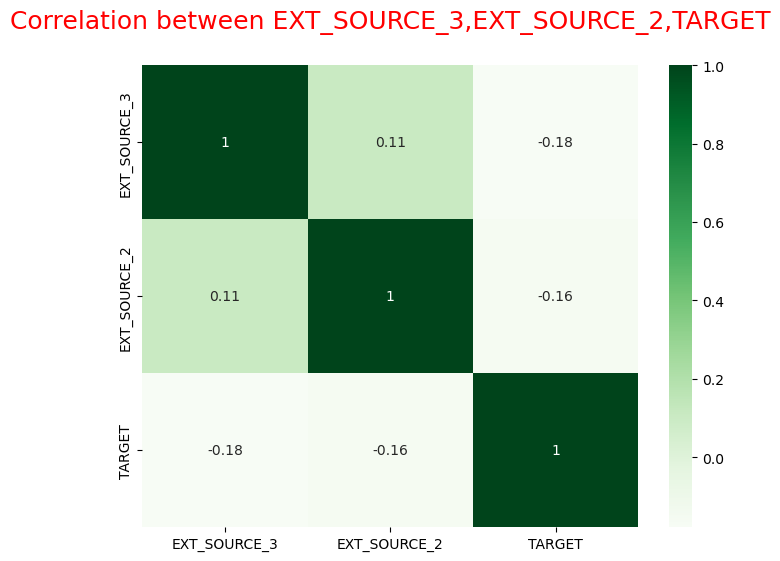

In [30]:
plt.figure(figsize = [8,6])

sns.heatmap(inp_appl[["EXT_SOURCE_3","EXT_SOURCE_2","TARGET"]].corr(), annot=True, cmap="Greens")

plt.title("Correlation between EXT_SOURCE_3,EXT_SOURCE_2,TARGET\n", fontdict={'fontsize':18,'fontweight':20,'color':'red'})

plt.show()

- It appears that there is no association after comparing those two columns to the target column. so that such columns can be eliminated from the dataframe.

In [31]:
# Dropping irrelevent columns

inp_appl.drop(irv, axis=1,inplace=True)

In [32]:
inp_appl.shape 

(307511, 71)

##  2.2.1 Check columns with FLAGS and relation with TARGET columns to remove irrelevant ones

Dataframe containing all FLAG columns and then plot bar graphs for each column with respect to TARGET columns which indicates '0' as Repayer and '1' as Defaulter

In [33]:
flag_col = [i for i in inp_appl.columns if 'FLAG' in i]
flag_col 

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [34]:
# Creating flag_t dataframe which would have all FLAG columns and TARGET columns

flag_t = inp_appl[flag_col+['TARGET']]

In [35]:
flag_t.shape

(307511, 29)

In [36]:
# Check flag_t columns
flag_t.head()

FLAG_OWN_CAR FLAG_OWN_REALTY  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  TARGET
0            N               Y           1               1                0                 1           1           0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0       1
1            N               N           1               1                0                 1           1           0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0       0
2            Y               Y           1               1                1                 1           1           0                0                0                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0       0
3            N               Y           1               1                0                 1           0           0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0       0
4            N               Y           1               1                0                 1           0           0                0                0                0                0                0                0                1                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0       0

In [37]:
flag_t["TARGET"] = flag_t["TARGET"].replace({1:'Defaulter',0:'Repayer'})

In [38]:
# Check flag_t columns
flag_t.head()

FLAG_OWN_CAR FLAG_OWN_REALTY  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21     TARGET
0            N               Y           1               1                0                 1           1           0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0  Defaulter
1            N               N           1               1                0                 1           1           0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0    Repayer
2            Y               Y           1               1                1                 1           1           0                0                0                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0    Repayer
3            N               Y           1               1                0                 1           0           0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0    Repayer
4            N               Y           1               1                0                 1           0           0                0                0                0                0                0                0                1                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0    Repayer

In [39]:
#  Replacing Columns "1" as Y(TRUE) and "0" as N(False)
for i in flag_t:
    if i!='TARGET':
        flag_t[i] = flag_t[i].replace({1:'Y',0:'N'})

In [40]:
flag_t.head()

FLAG_OWN_CAR FLAG_OWN_REALTY FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL FLAG_DOCUMENT_2 FLAG_DOCUMENT_3 FLAG_DOCUMENT_4 FLAG_DOCUMENT_5 FLAG_DOCUMENT_6 FLAG_DOCUMENT_7 FLAG_DOCUMENT_8 FLAG_DOCUMENT_9 FLAG_DOCUMENT_10 FLAG_DOCUMENT_11 FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15 FLAG_DOCUMENT_16 FLAG_DOCUMENT_17 FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21     TARGET
0            N               Y          Y              Y               N                Y          Y          N               N               Y               N               N               N               N               N               N                N                N                N                N                N                N                N                N                N                N                N                N  Defaulter
1            N               N          Y              Y               N                Y          Y          N               N               Y               N               N               N               N               N               N                N                N                N                N                N                N                N                N                N                N                N                N    Repayer
2            Y               Y          Y              Y               Y                Y          Y          N               N               N               N               N               N               N               N               N                N                N                N                N                N                N                N                N                N                N                N                N    Repayer
3            N               Y          Y              Y               N                Y          N          N               N               Y               N               N               N               N               N               N                N                N                N                N                N                N                N                N                N                N                N                N    Repayer
4            N               Y          Y              Y               N                Y          N          N               N               N               N               N               N               N               Y               N                N                N                N                N                N                N                N                N                N                N                N                N    Repayer

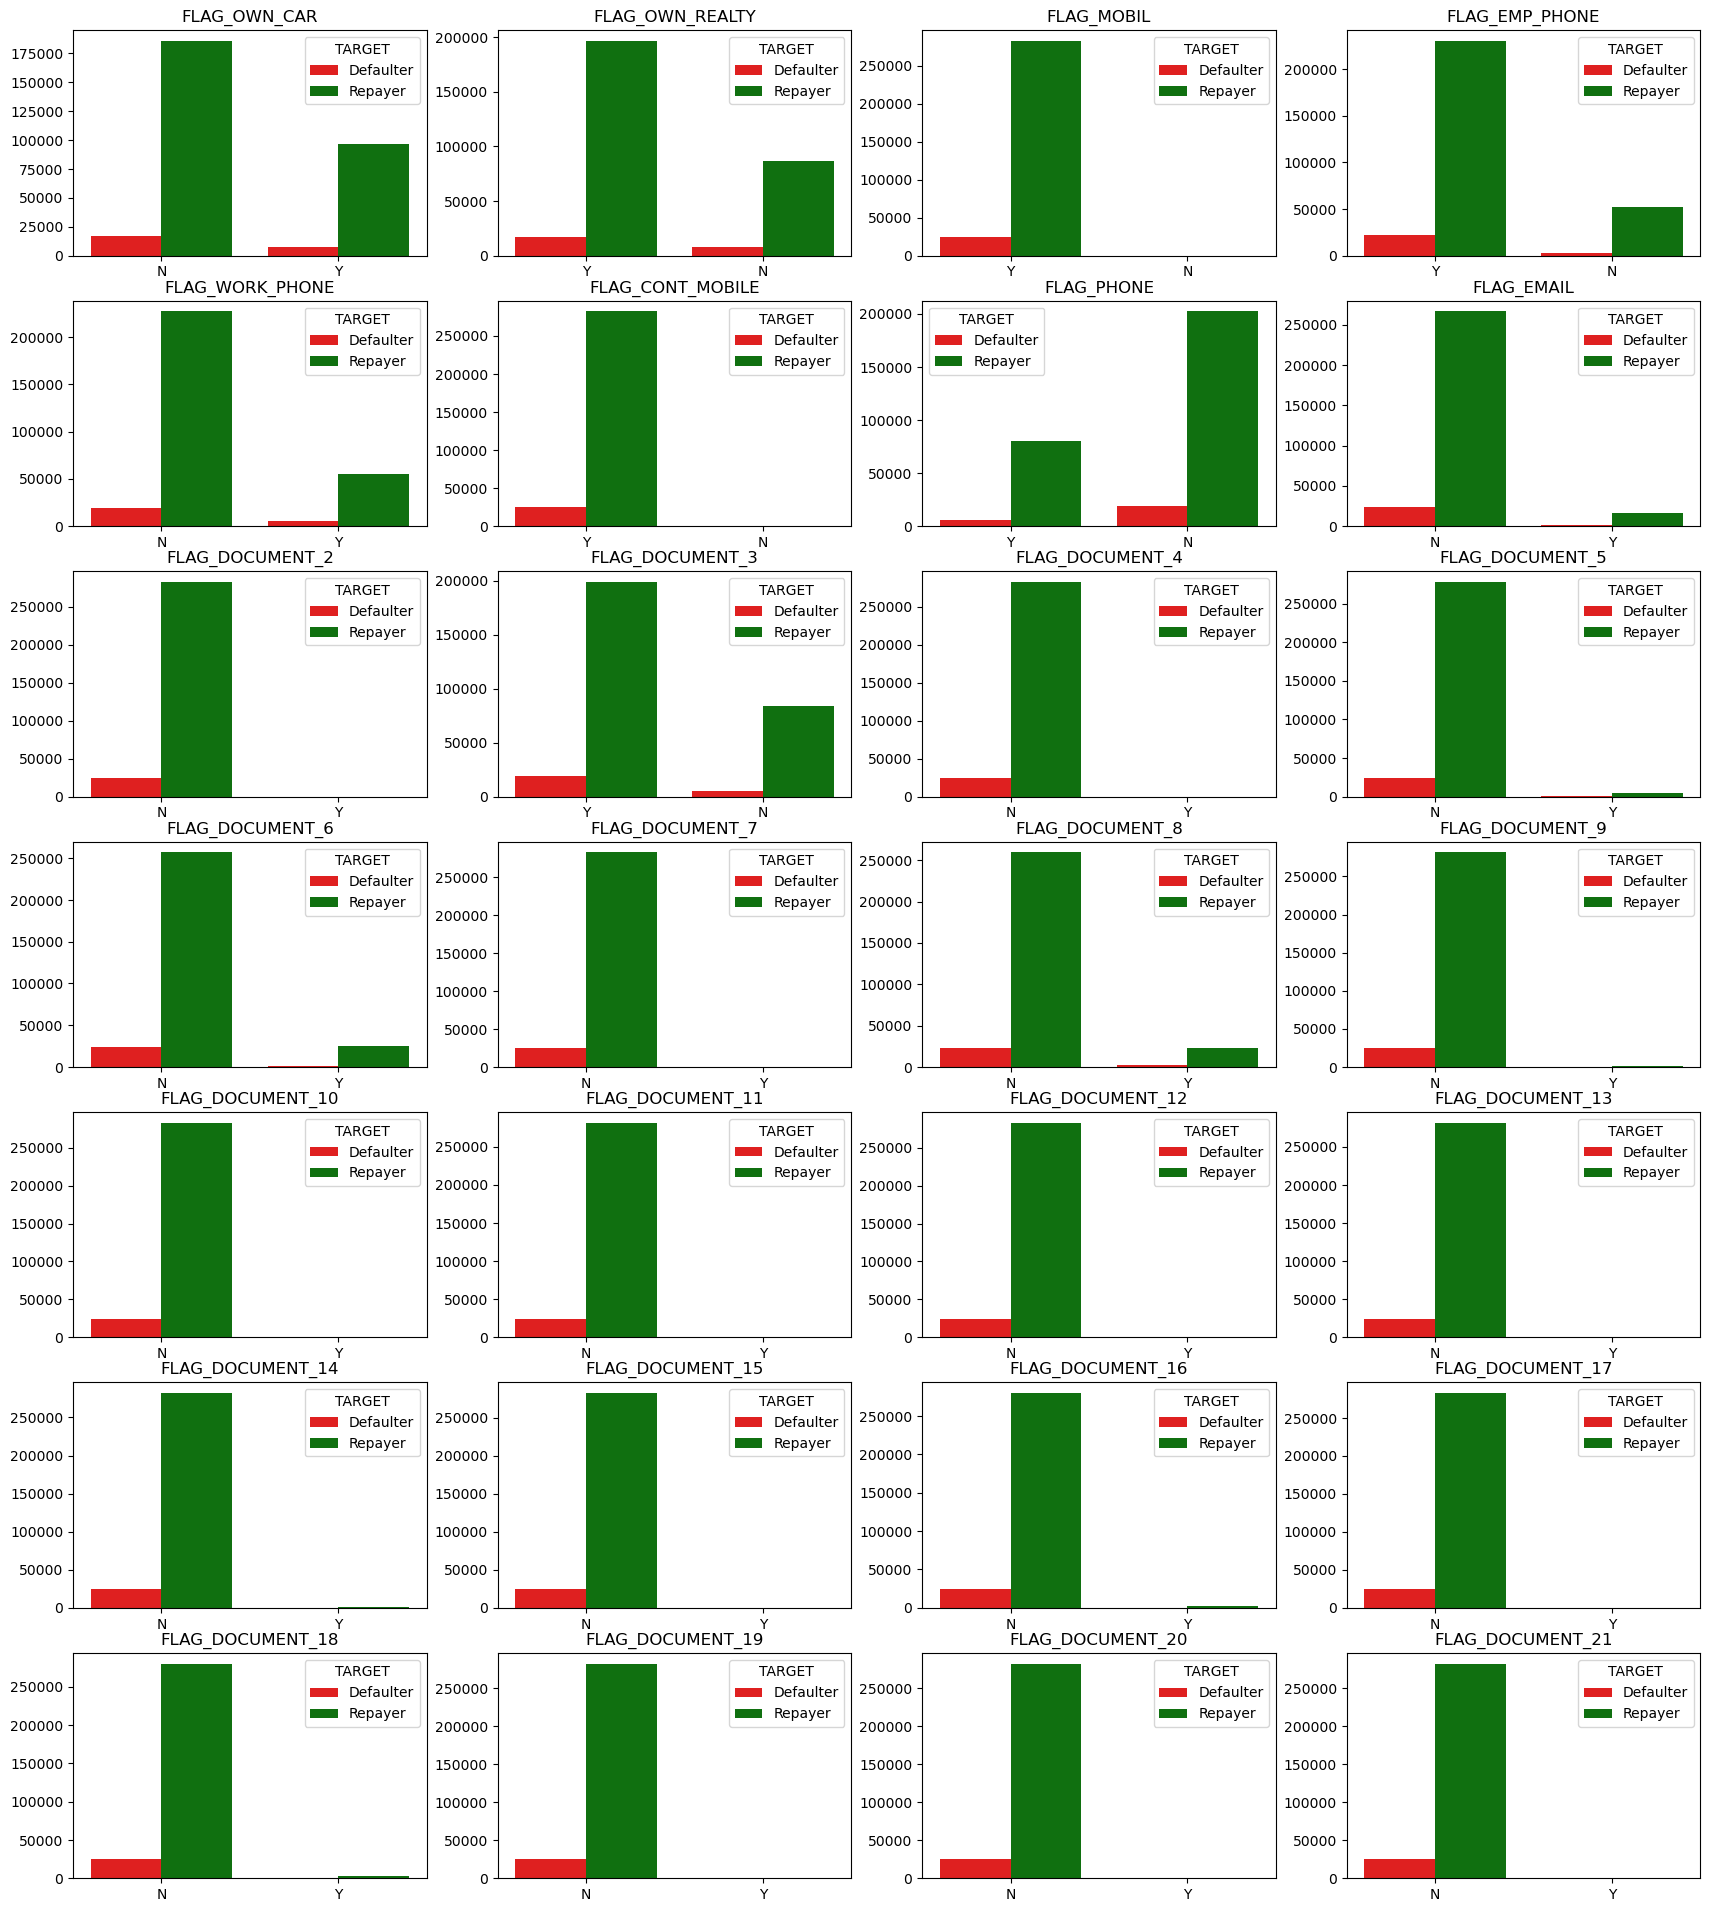

In [41]:
# using itertools for lopping plotting subplots
# plotting each possible graph which help to removing columns

import itertools
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[21, 24])

for i, j in itertools.zip_longest(flag_col, range(len(flag_col))):
    if i is None:  # Skip empty plots
        continue

    plt.subplot(7, 4, j + 1)

    # Ensure TARGET is categorical
    flag_t["TARGET"] = flag_t["TARGET"].astype(str)

    # Fill missing values in the current column
    flag_t[i] = flag_t[i].fillna("Unknown")

    # Pass column names explicitly
    ax = sns.countplot(x=i, hue="TARGET", data=flag_t, palette=["r", "g"])

    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

plt.show()

### Findings

- Columns (FLAG_OWN_REALTY, FLAG_MOBIL ,FLAG_EMP_PHONE, FLAG_CONT_MOBILE, FLAG_DOCUMENT_3) have more repayers than defaulter and Keep these  FLAG_OWN_REALTY,FLAG_MOBIL, FLAG_DOCUMENT_3 in the dataframe and remove rest of the columns from our dataframe.
- **FLAG_OWN_REALTY:**	Flag if client owns a house or flat
- **FLAG_MOBIL:**	Did client provide mobile phone (1=YES, 0=NO)
- **FLAG_DOCUMENT_3:**	Did client provide document 3

In [42]:
# Remove Required columns in from "flag_t". so that we can remove irrelevent columns from "inp_appl" dataset
flag_t.drop(['TARGET','FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_DOCUMENT_3'], axis=1, inplace= True)

In [43]:
# Recheck length of columns from "flag_t" dataframe
len(flag_t.columns)

25

In [44]:
# Droping columns of "flag_t" from "inp_appl" dataframe which will remove 25 columns from "inp_appl" dataframe

inp_appl.drop(flag_t.columns,axis=1, inplace= True)

In [45]:
inp_appl.shape

(307511, 46)

Left with 46 columns after removing unnecessary columns from dataframe

## 3. Imputing values

- Imputing values from relevent missing columns

In [46]:
null_values(inp_appl).head(15)

OCCUPATION_TYPE               31.35
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
NAME_TYPE_SUITE                0.42
OBS_60_CNT_SOCIAL_CIRCLE       0.33
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
AMT_GOODS_PRICE                0.09
AMT_ANNUITY                    0.00
CNT_FAM_MEMBERS                0.00
dtype: float64

Missing values are having in 7 columns which need to be input in further analysis.

In [47]:
# Check Percentage of each category available in "OCCUPATION_TYPE"

inp_appl.OCCUPATION_TYPE.value_counts(normalize=True)*100

OCCUPATION_TYPE
Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: proportion, dtype: float64

Columns are having cateogorical values which is having 31.35% missing values. Imputing all null values "Unknown" for all missing values.

In [180]:
# Imputing null value with "Unknown"
inp_appl['OCCUPATION_TYPE'] = inp_appl.OCCUPATION_TYPE.fillna('Unknown')

In [49]:
# Checking null value should be zero
inp_appl['OCCUPATION_TYPE'].isnull().sum()

0

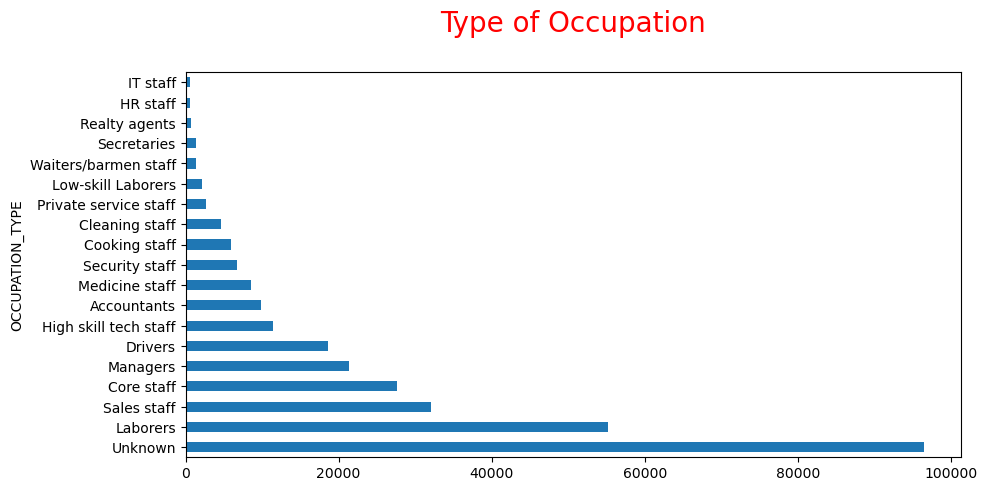

In [50]:
# Ploting a graph having each cateogry "OCCUPATION_TYPE"

plt.figure(figsize = [10,5])

(inp_appl['OCCUPATION_TYPE'].value_counts()).plot.barh(width = .5)
plt.title("Type of Occupation\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Red'})

plt.show()

- Top Cateogory is "Unknown" and second belongs to "Laborers"

### Checking rest of the 6 columns

- AMT_REQ_CREDIT_BUREAU_YEAR
- AMT_REQ_CREDIT_BUREAU_QRT
- AMT_REQ_CREDIT_BUREAU_MON
- AMT_REQ_CREDIT_BUREAU_WEEK
- AMT_REQ_CREDIT_BUREAU_DAY
- AMT_REQ_CREDIT_BUREAU_HOUR

In [51]:
inp_appl[['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON',
          'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR']].describe()

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR
count               265992.000000              265992.000000              265992.000000               265992.000000              265992.000000               265992.000000
mean                     1.899974                   0.265474                   0.267395                    0.034362                   0.007000                    0.006402
std                      1.869295                   0.794056                   0.916002                    0.204685                   0.110757                    0.083849
min                      0.000000                   0.000000                   0.000000                    0.000000                   0.000000                    0.000000
25%                      0.000000                   0.000000                   0.000000                    0.000000                   0.000000                    0.000000
50%                      1.000000                   0.000000                   0.000000                    0.000000                   0.000000                    0.000000
75%                      3.000000                   0.000000                   0.000000                    0.000000                   0.000000                    0.000000
max                     25.000000                 261.000000                  27.000000                    8.000000                   9.000000                    4.000000

- Above all are numerical values. There are few outliers in some columns. So that we will used **median** for imputing the values.


In [52]:
# Creating "amt_credit" variable for 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR'

amt_credit = ['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON',
          'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR']



In [53]:
# Imputing missing values with median values

inp_appl.fillna(inp_appl[amt_credit].median(), inplace=True)

In [54]:
null_values(inp_appl).head(10)

NAME_TYPE_SUITE             0.42
DEF_60_CNT_SOCIAL_CIRCLE    0.33
OBS_60_CNT_SOCIAL_CIRCLE    0.33
DEF_30_CNT_SOCIAL_CIRCLE    0.33
OBS_30_CNT_SOCIAL_CIRCLE    0.33
AMT_GOODS_PRICE             0.09
AMT_ANNUITY                 0.00
CNT_FAM_MEMBERS             0.00
DAYS_LAST_PHONE_CHANGE      0.00
ORGANIZATION_TYPE           0.00
dtype: float64

- Missing Value are still there in the dataframe. However, we will not impute due to less missing values

## 4. Standardising values 

In [55]:
inp_appl.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000             306490.000000             306490.000000             306490.000000             306490.000000           307510.000000    307511.000000               307511.000000              307511.000000               307511.000000              307511.000000              307511.000000               307511.000000
mean   278180.518577       0.080729       0.417052      1.687979e+05  5.990260e+05   27108.573909     5.383962e+05                    0.020868  -16036.995067   63815.045904       -4986.120328     -2994.202373       0.999997         2.152665              2.052463                     2.031521                12.063419                    0.015144                    0.050769                     0.040659                0.078173                0.230454                 0.179555                  1.422245                  0.143421                  1.405292                  0.100049             -962.858788         0.710023                    0.005538                   0.006055                    0.029723                   0.231293                   0.229631                    1.778463
std    102790.175348       0.272419       0.722121      2.371231e+05  4.024908e+05   14493.737315     3.694465e+05                    0.013831    4363.988632  141275.766519        3522.886321      1509.450419       0.001803         0.910682              0.509034                     0.502737                 3.265832                    0.122126                    0.219526                     0.197499                0.268444                0.421124                 0.383817                  2.400989                  0.446698                  2.379803                  0.362291              826.808487         0.453752                    0.078014                   0.103037                    0.190728                   0.856810                   0.744059                    1.765523
min    100002.000000       0.000000       0.000000      2.565000e+04  4.500000e+04    1615.500000     4.050000e+04                    0.000290  -25229.000000  -17912.000000      -24672.000000     -7197.000000       0.000000         1.000000              1.000000                     1.000000                 0.000000                    0.000000                    0.000000                     0.000000                0.000000                0.000000                 0.000000                  0.000000                  0.000000                  0.000000                  0.000000            -4292.000000         0.000000                    0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000
25%    189145.500000       0.000000       0.000000      1.125000e+05  2.700000e+05   

## Findings

- **Columns AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE have very high values due to which we have make numerical columns in categorical columns for better visibility.**
-  **Columns DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE which counts days have negative values which need correct.**
- **Convert DAYS_BIRTH to AGE in years , DAYS_EMPLOYED to YEARS EMPLOYED.**

### Working AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE columns to make categorical

In [56]:
# Creating Numerical Columns to a categorical column

# Creating income columns in lakhs

inp_appl['AMT_INCOME_TOTAL'] = inp_appl['AMT_INCOME_TOTAL']/100000

# Creating buckets in lakhs 
inp_appl['AMT_INCOME_RANGE'] = pd.cut(inp_appl['AMT_INCOME_TOTAL'],[0,1,2,3,4,5,6,7,8,9,10,100],
        labels=['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','Above 10L'])


In [57]:
round((inp_appl['AMT_INCOME_RANGE'].value_counts(normalize = True)*100),2)

AMT_INCOME_RANGE
1L-2L        50.70
2L-3L        21.19
0-1L         20.71
3L-4L         4.77
4L-5L         1.74
5L-6L         0.36
6L-7L         0.28
8L-9L         0.10
Above 10L     0.08
7L-8L         0.05
9L-10L        0.01
Name: proportion, dtype: float64

In [58]:
inp_appl[['AMT_INCOME_TOTAL','AMT_INCOME_RANGE']]

AMT_INCOME_TOTAL AMT_INCOME_RANGE
0                  2.025            2L-3L
1                  2.700            2L-3L
2                  0.675             0-1L
3                  1.350            1L-2L
4                  1.215            1L-2L
...                  ...              ...
307506             1.575            1L-2L
307507             0.720             0-1L
307508             1.530            1L-2L
307509             1.710            1L-2L
307510             1.575            1L-2L

[307511 rows x 2 columns]

In [59]:
# Creating amount goods price in lakhs

# Creating buckets in lakhs 
inp_appl['AMT_CREDIT'] = inp_appl['AMT_CREDIT']/100000

inp_appl['AMT_CREDIT_RANGE'] = pd.cut(inp_appl['AMT_CREDIT'],[0,1,2,3,4,5,6,7,8,9,10,100],
        labels=['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','Above 10L'])

In [60]:
round((inp_appl['AMT_CREDIT_RANGE'].value_counts(normalize = True)*100),2)

AMT_CREDIT_RANGE
2L-3L        17.82
Above 10L    16.25
5L-6L        11.13
4L-5L        10.42
1L-2L         9.80
3L-4L         8.56
6L-7L         7.82
8L-9L         7.09
7L-8L         6.24
9L-10L        2.90
0-1L          1.95
Name: proportion, dtype: float64

In [61]:
inp_appl[['AMT_CREDIT','AMT_CREDIT_RANGE']]

AMT_CREDIT AMT_CREDIT_RANGE
0         4.065975            4L-5L
1        12.935025        Above 10L
2         1.350000            1L-2L
3         3.126825            3L-4L
4         5.130000            5L-6L
...            ...              ...
307506    2.547000            2L-3L
307507    2.695500            2L-3L
307508    6.776640            6L-7L
307509    3.701070            3L-4L
307510    6.750000            6L-7L

[307511 rows x 2 columns]

In [62]:
# Creating amount credit in lakhs

# Creating buckets in lakhs 
inp_appl['AMT_GOODS_PRICE'] = inp_appl['AMT_GOODS_PRICE']/100000

inp_appl['AMT_GOODS_PRICE_RANGE'] = pd.cut(inp_appl['AMT_GOODS_PRICE'],[0,1,2,3,4,5,6,7,8,9,10,100],
        labels=['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','Above 10L'])

In [63]:
round((inp_appl['AMT_GOODS_PRICE_RANGE'].value_counts(normalize = True)*100),2)

AMT_GOODS_PRICE_RANGE
2L-3L        20.43
4L-5L        18.54
6L-7L        13.03
Above 10L    11.11
1L-2L        10.73
8L-9L         6.99
3L-4L         6.91
5L-6L         4.27
0-1L          2.83
7L-8L         2.64
9L-10L        2.53
Name: proportion, dtype: float64

In [64]:
inp_appl[['AMT_GOODS_PRICE','AMT_GOODS_PRICE_RANGE']]

AMT_GOODS_PRICE AMT_GOODS_PRICE_RANGE
0                 3.510                 3L-4L
1                11.295             Above 10L
2                 1.350                 1L-2L
3                 2.970                 2L-3L
4                 5.130                 5L-6L
...                 ...                   ...
307506            2.250                 2L-3L
307507            2.250                 2L-3L
307508            5.850                 5L-6L
307509            3.195                 3L-4L
307510            6.750                 6L-7L

[307511 rows x 2 columns]

- Checking Days columns **DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE**

In [65]:
#using abs() function to correct the days values

inp_appl[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", 
                "DAYS_LAST_PHONE_CHANGE"]] = abs(inp_appl[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", 
                                                                 "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]])

In [66]:
# Check the dataframe

inp_appl[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE
count  307511.000000  307511.000000      307511.000000    307511.000000           307510.000000
mean    16036.995067   67724.742149        4986.120328      2994.202373              962.858788
std      4363.988632  139443.751806        3522.886321      1509.450419              826.808487
min      7489.000000       0.000000           0.000000         0.000000                0.000000
25%     12413.000000     933.000000        2010.000000      1720.000000              274.000000
50%     15750.000000    2219.000000        4504.000000      3254.000000              757.000000
75%     19682.000000    5707.000000        7479.500000      4299.000000             1570.000000
max     25229.000000  365243.000000       24672.000000      7197.000000             4292.000000

- Convert days to years upto 2 decimals places **DAYS_BIRTH, DAYS_EMPLOYED**

In [67]:
# Creating buckets according to age Group in years.
inp_appl['AGE_IN_YEARS'] = round(inp_appl['DAYS_BIRTH']/365,2)

inp_appl['AGE_GROUP'] = pd.cut(inp_appl['AGE_IN_YEARS'],[0,20,25,30,35,40,45,50,55,60,100],
                             labels=   ["0-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60 Above"])

In [68]:
inp_appl[['AGE_GROUP','AGE_IN_YEARS']]

AGE_GROUP  AGE_IN_YEARS
0          25-30         25.92
1          45-50         45.93
2          50-55         52.18
3          50-55         52.07
4          50-55         54.61
...          ...           ...
307506     25-30         25.55
307507     55-60         56.92
307508     40-45         41.00
307509     30-35         32.77
307510     45-50         46.18

[307511 rows x 2 columns]

In [69]:
#creating column "EMPLOYEMENT_YEARS" from "DAYS_EMPLOYED
# Creating buckets according to EMPLOYEMENT_YEARS in years.
inp_appl['YEAR_EMPLOYED'] = round(inp_appl['DAYS_EMPLOYED']/365,2)

inp_appl['EMPLOYEMENT_YEARS'] = pd.cut(inp_appl['YEAR_EMPLOYED'],[0,5,10,15,20,25,30,50],
                                   labels=["0-5","5-10","10-15","15-20","20-25","25-30","30 Above"])

In [70]:
inp_appl[['EMPLOYEMENT_YEARS','YEAR_EMPLOYED']]

EMPLOYEMENT_YEARS  YEAR_EMPLOYED
0                    0-5           1.75
1                    0-5           3.25
2                    0-5           0.62
3                   5-10           8.33
4                   5-10           8.32
...                  ...            ...
307506               0-5           0.65
307507               NaN        1000.67
307508             20-25          21.70
307509             10-15          13.11
307510               0-5           3.46

[307511 rows x 2 columns]

## 5. Checking Outliers

In [71]:
inp_appl.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL     AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR   AGE_IN_YEARS  YEAR_EMPLOYED
count  307511.000000  307511.000000  307511.000000     307511.000000  307511.000000  307499.000000    307233.000000               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000             306490.000000             306490.000000             306490.000000             306490.000000           307510.000000    307511.000000               307511.000000              307511.000000               307511.000000              307511.000000              307511.000000               307511.000000  307511.000000  307511.000000
mean   278180.518577       0.080729       0.417052          1.687979       5.990260   27108.573909         5.383962                    0.020868   16036.995067   67724.742149        4986.120328      2994.202373       0.999997         2.152665              2.052463                     2.031521                12.063419                    0.015144                    0.050769                     0.040659                0.078173                0.230454                 0.179555                  1.422245                  0.143421                  1.405292                  0.100049              962.858788         0.710023                    0.005538                   0.006055                    0.029723                   0.231293                   0.229631                    1.778463      43.936976     185.548007
std    102790.175348       0.272419       0.722121          2.371231       4.024908   14493.737315         3.694465                    0.013831    4363.988632  139443.751806        3522.886321      1509.450419       0.001803         0.910682              0.509034                     0.502737                 3.265832                    0.122126                    0.219526                     0.197499                0.268444                0.421124                 0.383817                  2.400989                  0.446698                  2.379803                  0.362291              826.808487         0.453752                    0.078014                   0.103037                    0.190728                   0.856810                   0.744059                    1.765523      11.956135     382.039306
min    100002.000000       0.000000       0.000000          0.256500       0.450000    1615.500000         0.405000                    0.000290    7489.000000       0.000000           0.000000         0.000000       0.000000         1.000000              1.000000                     1.000000                 0.000000                    0.000000                    0.000000                     0.000000                0.000000                0.000000                 0.000000                  0.000000                  0.000000                  0.000000                  0.000000                0.000000         0.000000                    0.000000                   0.000000                    0.000000                   0.000000                

- Find the difference between max and 75 percentile. There is no use to take max value to be so high.

In [72]:
COL_OUTLIERS = ["CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
               "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION"]

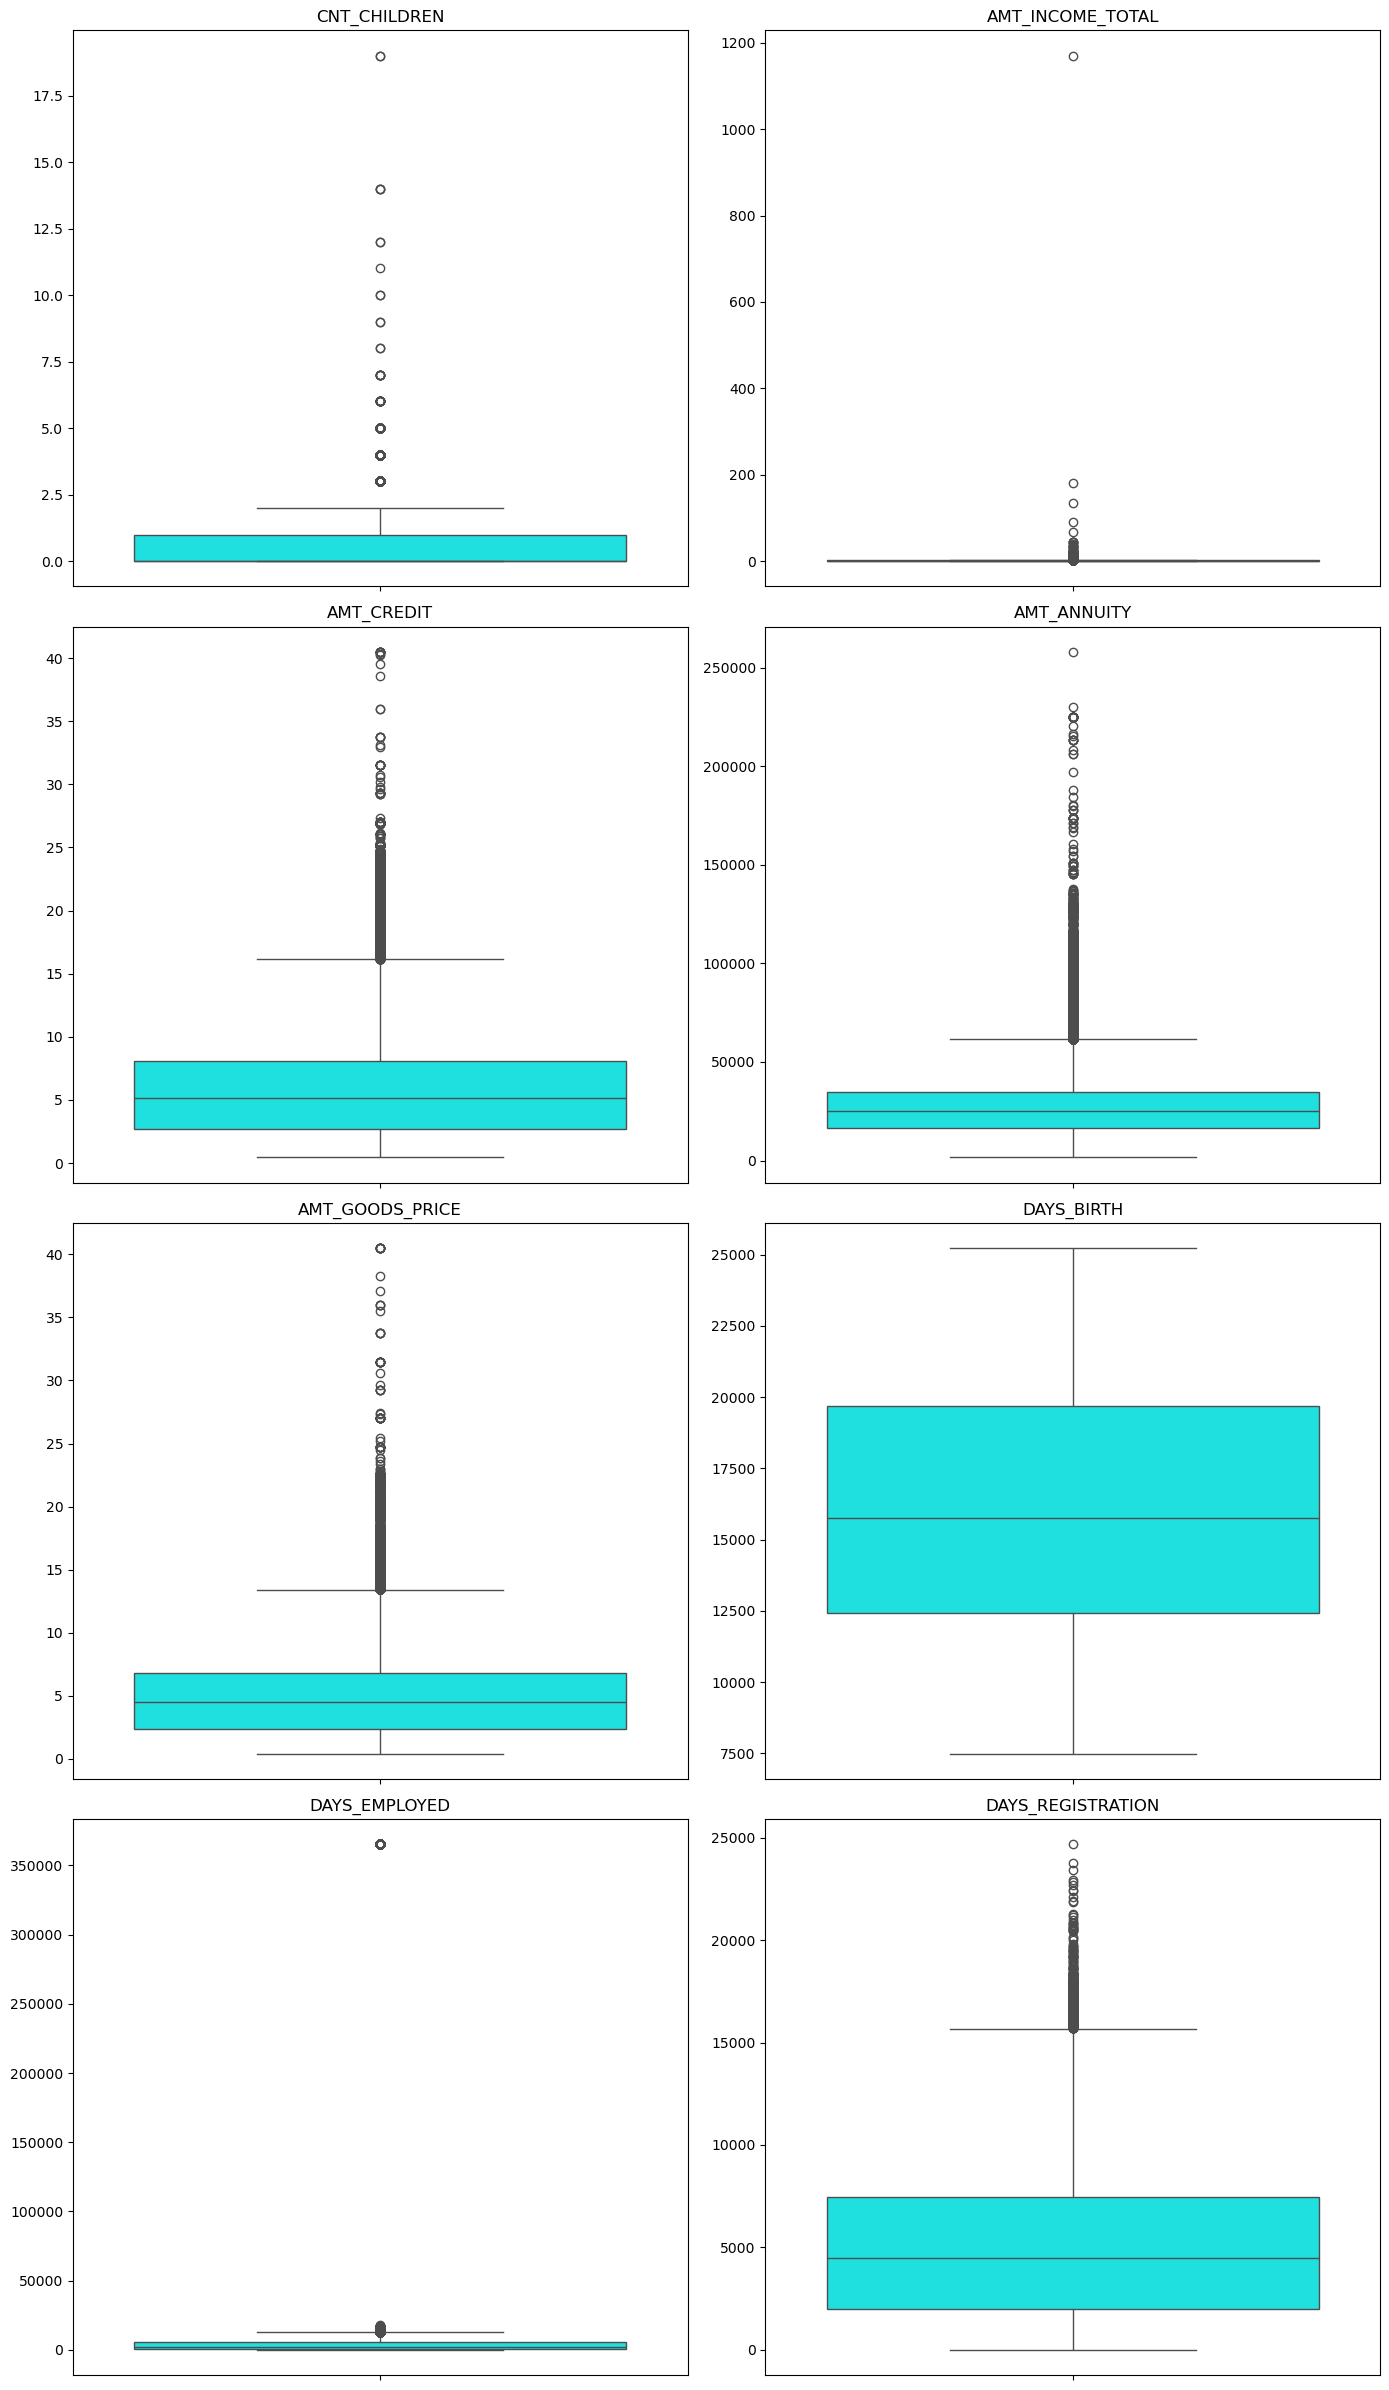

In [73]:
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[14, 24])

# Ensure columns exist and are numeric
valid_cols = [col for col in COL_OUTLIERS if col in inp_appl.columns and inp_appl[col].dtype in ['int64', 'float64']]

for i, j in itertools.zip_longest(valid_cols, range(len(valid_cols))):
    if i is None:  # Skip empty values
        continue

    plt.subplot(4, 2, j + 1)
    
    # Drop NaN values before plotting
    sns.boxplot(y=inp_appl[i].dropna(), orient="h", color="cyan")

    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

plt.tight_layout()
plt.show()

## Findings:
   * **AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.**
   * **AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.**
   * **DAYS_BIRTH has no outliers which means the data available is reliable.**
   * **DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years and that is impossible which proves that it is incorrect value.**

In [74]:
inp_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_REALTY              307511 non-null  object  
 5   CNT_CHILDREN                 307511 non-null  int64   
 6   AMT_INCOME_TOTAL             307511 non-null  float64 
 7   AMT_CREDIT                   307511 non-null  float64 
 8   AMT_ANNUITY                  307499 non-null  float64 
 9   AMT_GOODS_PRICE              307233 non-null  float64 
 10  NAME_TYPE_SUITE              306219 non-null  object  
 11  NAME_INCOME_TYPE             307511 non-null  object  
 12  NAME_EDUCATION_TYPE          307511 non-null

## 6. Converting few columns from object,int into categorical column

In [75]:
inp_appl.columns


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT

In [76]:
# Taking desired columns for conversion

categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY','CNT_CHILDREN','CNT_FAM_MEMBERS']

for col in categorical_columns:
    inp_appl[col] = pd.Categorical(inp_appl[col])

In [77]:
len(categorical_columns) # 21 columns has been converted into categorical one

21

In [78]:
inp_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_REALTY              307511 non-null  category
 5   CNT_CHILDREN                 307511 non-null  category
 6   AMT_INCOME_TOTAL             307511 non-null  float64 
 7   AMT_CREDIT                   307511 non-null  float64 
 8   AMT_ANNUITY                  307499 non-null  float64 
 9   AMT_GOODS_PRICE              307233 non-null  float64 
 10  NAME_TYPE_SUITE              306219 non-null  category
 11  NAME_INCOME_TYPE             307511 non-null  category
 12  NAME_EDUCATION_TYPE          307511 non-null

## Dataset 2 : "previous_application.csv"

In [79]:
prev_appl = pd.read_csv('previous_application.csv')

In [80]:
prev_appl.head(7)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

In [81]:
prev_appl.shape

(1670214, 37)

- There are 37 Columns and 1670214 Rows

In [82]:
prev_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [83]:
# Checking numeric variable of the dataframe
prev_appl.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06  1.670213e+06      7.743700e+05     1.284699e+06             1.670214e+06            1.670214e+06      774370.000000            5951.000000               5951.000000   1.670214e+06      1.670214e+06  1.297984e+06       997149.000000   997149.000000              997149.000000  997149.000000     997149.000000              997149.000000
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05  1.961140e+05      6.697402e+03     2.278473e+05             1.248418e+01            9.964675e-01           0.079637               0.188357                  0.773503  -8.806797e+02      3.139511e+02  1.605408e+01       342209.855039    13826.269337               33767.774054   76582.403064      81992.343838                   0.332570
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05  3.185746e+05      2.092150e+04     3.153966e+05             3.334028e+00            5.932963e-02           0.107823               0.087671                  0.100879   7.790997e+02      7.127443e+03  1.456729e+01        88916.115834    72444.869708              106857.034789  149647.415123     153303.516729                   0.471134
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00  0.000000e+00     -9.000000e-01     0.000000e+00             0.000000e+00            0.000000e+00          -0.000015               0.034781                  0.373150  -2.922000e+03     -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000               -2801.000000   -2889.000000      -2874.000000                   0.000000
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04  2.416050e+04      0.000000e+00     5.084100e+04             1.000000e+01            1.000000e+00           0.000000               0.160716                  0.715645  -1.300000e+03     -1.000000e+00  6.000000e+00       365243.000000    -1628.000000               -1242.000000   -1314.000000      -1270.000000                   0.000000
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04  8.054100e+04      1.638000e+03     1.123200e+05             1.200000e+01            1.000000e+00           0.051605               0.189122                  0.835095  -5.810000e+02      3.000000e+00  1.200000e+01       365243.000000     -831.000000                -361.000000    -537.000000       -499.000000                   0.000000
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05  2.164185e+05      7.740000e+03     2.340000e+05             1.500000e+01            1.000000e+00           0.108909               0.193330                  0.852537  -2.800000e+02      8.200000e+01  2.400000e+01       365243.000000     -411.000000                 129.000000     -74.000000        -44.000000                   1.000000
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06  6.905160e+06      3.060045e+06     6.905160e+06             2.300000e+01            1.000000e+00           1.000000               1.000000                  1.000000  -1.000000e+00      4.000000e+06  8.400000e+01       365243.000000   365243.000000              365243.000000  365243.000000     365243.000000                   1.000000

In [84]:
# Checking nullvalues present in the dataframe

null_values(prev_appl)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
AMT_DOWN_PAYMENT               53.64
RATE_DOWN_PAYMENT              53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_TERMINATION               40.30
DAYS_LAST_DUE                  40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_FIRST_DUE                 40.30
DAYS_FIRST_DRAWING             40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
NAME_YIELD_GROUP                0.00
NAME_PORTFOLIO                  0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
SK_ID_PREV                      0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
D

In [85]:
# Create p_null variable for storing null columns having missing values more than 50%

p_null = null_values(prev_appl)[null_values(prev_appl)>50]

In [86]:
p_null

RATE_INTEREST_PRIVILEGED    99.64
RATE_INTEREST_PRIMARY       99.64
AMT_DOWN_PAYMENT            53.64
RATE_DOWN_PAYMENT           53.64
dtype: float64

##### There are 4 columns with missing values more than 50%

In [87]:
# Dropping Null columns having missing values more than 50%

prev_appl.drop(columns = p_null.index, inplace=True)

In [88]:
null_values(prev_appl)

NAME_TYPE_SUITE                49.12
DAYS_FIRST_DRAWING             40.30
DAYS_TERMINATION               40.30
DAYS_LAST_DUE                  40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_FIRST_DUE                 40.30
NFLAG_INSURED_ON_APPROVAL      40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
NAME_CONTRACT_TYPE              0.00
AMT_APPLICATION                 0.00
NAME_YIELD_GROUP                0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_PORTFOLIO                  0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
SK_ID_CURR                      0.00
CODE_REJECT_REASON              0.00
NAME_PAYMENT_TYPE               0.00
D

In [89]:
# Create p_null_15 variable for storing null columns having missing values more than 15%

p_null_15 = null_values(prev_appl)[null_values(prev_appl)>15]

In [90]:
p_null_15

NAME_TYPE_SUITE              49.12
DAYS_FIRST_DRAWING           40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
NFLAG_INSURED_ON_APPROVAL    40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
dtype: float64

In [91]:
prev_appl[p_null_15.index]

NAME_TYPE_SUITE  DAYS_FIRST_DRAWING  DAYS_TERMINATION  DAYS_LAST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DUE  NFLAG_INSURED_ON_APPROVAL  AMT_GOODS_PRICE  AMT_ANNUITY  CNT_PAYMENT
0                    NaN            365243.0             -37.0          -42.0                      300.0           -42.0                        0.0          17145.0     1730.430         12.0
1          Unaccompanied            365243.0          365243.0       365243.0                      916.0          -134.0                        1.0         607500.0    25188.615         36.0
2        Spouse, partner            365243.0          365243.0       365243.0                       59.0          -271.0                        1.0         112500.0    15060.735         12.0
3                    NaN            365243.0            -177.0         -182.0                     -152.0          -482.0                        1.0         450000.0    47041.335         12.0
4                    NaN                 NaN               NaN            NaN                        NaN             NaN                        NaN         337500.0    31924.395         24.0
...                  ...                 ...               ...            ...                        ...             ...                        ...              ...          ...          ...
1670209              NaN            365243.0            -351.0         -358.0                      362.0          -508.0                        0.0         267295.5    14704.290         30.0
1670210    Unaccompanied            365243.0           -1297.0        -1304.0                    -1274.0         -1604.0                        0.0          87750.0     6622.020         12.0
1670211  Spouse, partner            365243.0           -1181.0        -1187.0                    -1187.0         -1457.0                        0.0         105237.0    11520.855         10.0
1670212           Family            365243.0            -817.0         -825.0                     -825.0         -1155.0                        1.0         180000.0    18821.520         12.0
1670213           Family            365243.0            -423.0         -443.0                      247.0         -1163.0                        0.0         360000.0    16431.300         48.0

[1670214 rows x 10 columns]

In [92]:
prev_appl.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], dtype='object')

In [93]:
# Drop all unnecessary columns

p_unnecessary = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
prev_appl.drop(p_unnecessary, axis=1, inplace=True)
prev_appl.shape

(1670214, 29)

In [94]:
# Imputing values "Unknown" in categorical column
prev_appl["NAME_TYPE_SUITE"] = prev_appl["NAME_TYPE_SUITE"].fillna("Unknown")
null_values(prev_appl)

NFLAG_INSURED_ON_APPROVAL    40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
DAYS_FIRST_DRAWING           40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
PRODUCT_COMBINATION           0.02
AMT_CREDIT                    0.00
NAME_PRODUCT_TYPE             0.00
NAME_YIELD_GROUP              0.00
NAME_SELLER_INDUSTRY          0.00
SELLERPLACE_AREA              0.00
CHANNEL_TYPE                  0.00
SK_ID_PREV                    0.00
NAME_PORTFOLIO                0.00
SK_ID_CURR                    0.00
NAME_CLIENT_TYPE              0.00
NAME_TYPE_SUITE               0.00
CODE_REJECT_REASON            0.00
NAME_PAYMENT_TYPE             0.00
DAYS_DECISION                 0.00
NAME_CONTRACT_STATUS          0.00
NAME_CASH_LOAN_PURPOSE        0.00
AMT_APPLICATION               0.00
NAME_CONTRACT_TYPE            0.00
NAME_GOODS_CATEGORY 

In [95]:
# Analyse Numerical values 

prev_appl[p_null_15.index].describe()

DAYS_FIRST_DRAWING  DAYS_TERMINATION  DAYS_LAST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DUE  NFLAG_INSURED_ON_APPROVAL  AMT_GOODS_PRICE   AMT_ANNUITY   CNT_PAYMENT
count       997149.000000     997149.000000  997149.000000              997149.000000   997149.000000              997149.000000     1.284699e+06  1.297979e+06  1.297984e+06
mean        342209.855039      81992.343838   76582.403064               33767.774054    13826.269337                   0.332570     2.278473e+05  1.595512e+04  1.605408e+01
std          88916.115834     153303.516729  149647.415123              106857.034789    72444.869708                   0.471134     3.153966e+05  1.478214e+04  1.456729e+01
min          -2922.000000      -2874.000000   -2889.000000               -2801.000000    -2892.000000                   0.000000     0.000000e+00  0.000000e+00  0.000000e+00
25%         365243.000000      -1270.000000   -1314.000000               -1242.000000    -1628.000000                   0.000000     5.084100e+04  6.321780e+03  6.000000e+00
50%         365243.000000       -499.000000    -537.000000                -361.000000     -831.000000                   0.000000     1.123200e+05  1.125000e+04  1.200000e+01
75%         365243.000000        -44.000000     -74.000000                 129.000000     -411.000000                   1.000000     2.340000e+05  2.065842e+04  2.400000e+01
max         365243.000000     365243.000000  365243.000000              365243.000000   365243.000000                   1.000000     6.905160e+06  4.180581e+05  8.400000e+01

In [96]:
# Convert Negative values into Positive values and create a varaible p_days

p_days = ['DAYS_DECISION','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']


In [97]:
prev_appl[p_days].describe()

DAYS_DECISION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION
count   1.670214e+06       997149.000000   997149.000000              997149.000000  997149.000000     997149.000000
mean   -8.806797e+02       342209.855039    13826.269337               33767.774054   76582.403064      81992.343838
std     7.790997e+02        88916.115834    72444.869708              106857.034789  149647.415123     153303.516729
min    -2.922000e+03        -2922.000000    -2892.000000               -2801.000000   -2889.000000      -2874.000000
25%    -1.300000e+03       365243.000000    -1628.000000               -1242.000000   -1314.000000      -1270.000000
50%    -5.810000e+02       365243.000000     -831.000000                -361.000000    -537.000000       -499.000000
75%    -2.800000e+02       365243.000000     -411.000000                 129.000000     -74.000000        -44.000000
max    -1.000000e+00       365243.000000   365243.000000              365243.000000  365243.000000     365243.000000

In [98]:
# Convert Negative values into Positive Values

prev_appl[p_days] = abs(prev_appl[p_days])
prev_appl[p_days].describe()

DAYS_DECISION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION
count   1.670214e+06       997149.000000   997149.000000              997149.000000  997149.000000     997149.000000
mean    8.806797e+02       342340.056543    15949.224065               35163.363265   78152.730207      83505.775017
std     7.790997e+02        88413.495220    72007.270877              106405.950190  148833.342466     152484.418802
min     1.000000e+00            2.000000        2.000000                   0.000000       2.000000          2.000000
25%     2.800000e+02       365243.000000      475.000000                 257.000000     455.000000        447.000000
50%     5.810000e+02       365243.000000      921.000000                 741.000000    1155.000000       1171.000000
75%     1.300000e+03       365243.000000     1825.000000                1735.000000    2418.000000       2501.000000
max     2.922000e+03       365243.000000   365243.000000              365243.000000  365243.000000     365243.000000

In [99]:
# Days Groups as Yearly_Decision
 
prev_appl['YEARLY_DECISION'] = pd.cut(prev_appl['DAYS_DECISION'],[0,1*365,2*365,3*365,4*365,5*365,6*365,7*365,10*365],
                                      labels=["1","2","3","4","5","6","7","7 above"])

In [100]:
prev_appl['YEARLY_DECISION'].value_counts(normalize=True)*100

YEARLY_DECISION
1          34.351287
2          23.056806
3          12.855598
4           7.883181
5           6.128556
7           5.813806
7 above     5.060729
6           4.850037
Name: proportion, dtype: float64

34.35% Loan has been applied for new loan within one year.

In [101]:
null_values(prev_appl)

NFLAG_INSURED_ON_APPROVAL    40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
DAYS_FIRST_DRAWING           40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
PRODUCT_COMBINATION           0.02
AMT_CREDIT                    0.00
SK_ID_PREV                    0.00
CHANNEL_TYPE                  0.00
NAME_YIELD_GROUP              0.00
NAME_SELLER_INDUSTRY          0.00
SELLERPLACE_AREA              0.00
NAME_PORTFOLIO                0.00
NAME_PRODUCT_TYPE             0.00
SK_ID_CURR                    0.00
NAME_GOODS_CATEGORY           0.00
NAME_CLIENT_TYPE              0.00
NAME_TYPE_SUITE               0.00
CODE_REJECT_REASON            0.00
NAME_PAYMENT_TYPE             0.00
DAYS_DECISION                 0.00
NAME_CONTRACT_STATUS          0.00
NAME_CASH_LOAN_PURPOSE        0.00
AMT_APPLICATION               0.00
NAME_CONTRACT_TYPE  

In [102]:
prev_appl.nunique()

SK_ID_PREV                   1670214
SK_ID_CURR                    338857
NAME_CONTRACT_TYPE                 4
AMT_ANNUITY                   357959
AMT_APPLICATION                93885
AMT_CREDIT                     86803
AMT_GOODS_PRICE                93885
NAME_CASH_LOAN_PURPOSE            25
NAME_CONTRACT_STATUS               4
DAYS_DECISION                   2922
NAME_PAYMENT_TYPE                  4
CODE_REJECT_REASON                 9
NAME_TYPE_SUITE                    8
NAME_CLIENT_TYPE                   4
NAME_GOODS_CATEGORY               28
NAME_PORTFOLIO                     5
NAME_PRODUCT_TYPE                  3
CHANNEL_TYPE                       8
SELLERPLACE_AREA                2097
NAME_SELLER_INDUSTRY              11
CNT_PAYMENT                       49
NAME_YIELD_GROUP                   5
PRODUCT_COMBINATION               17
DAYS_FIRST_DRAWING              2838
DAYS_FIRST_DUE                  2892
DAYS_LAST_DUE_1ST_VERSION       2803
DAYS_LAST_DUE                   2873
D

### Impute Plot distribution columns
-  **median** if the distribution is skewed.
-  **mode** if the distribution pattern is preserved.

###  Imputing
- **AMT_ANNUITY:**	Annuity of previous application.
- **AMT_GOODS_PRICE:**	Goods price of good that client asked for (if applicable) on the previous application.

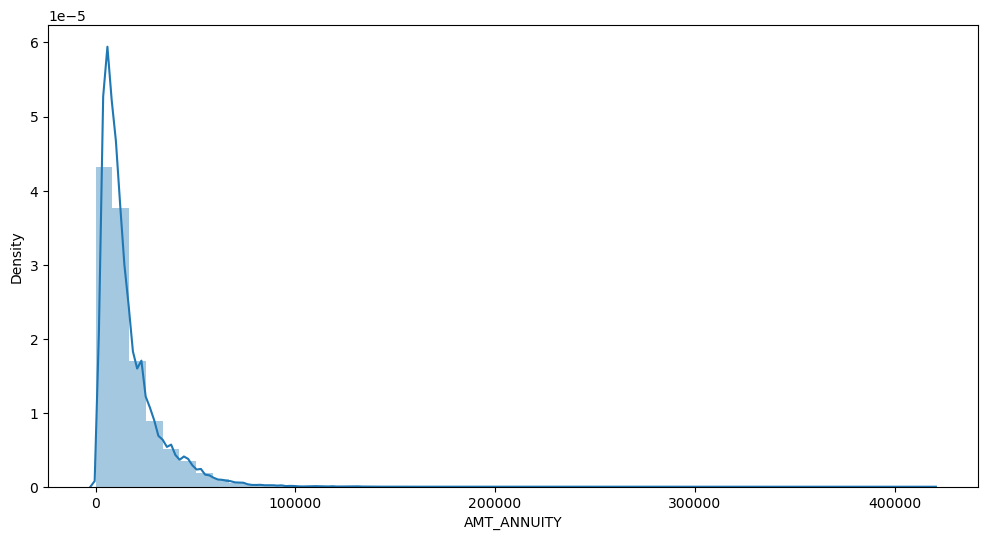

In [103]:
# Plot a graph to understand distribution of "AMT_ANNUITY"
plt.figure(figsize=(12,6))
sns.distplot(prev_appl['AMT_ANNUITY'])
plt.show()

There is only single peak at the left side of distribution which conclude that it should be impute  **median.**

In [104]:
prev_appl['AMT_ANNUITY'].fillna(prev_appl['AMT_ANNUITY'].median, inplace=True)

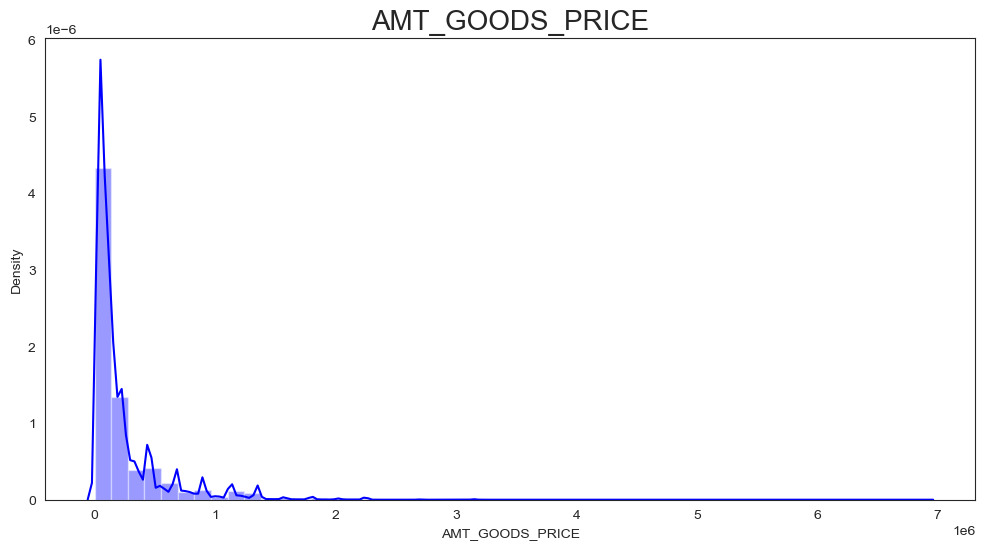

In [105]:
# plot a graph for "AMT_GOODS_PRICE" to understand the distribution
sns.set_style("white")
plt.figure(figsize=(12,6))
sns.distplot(prev_appl['AMT_GOODS_PRICE'],color="b")
plt.title("AMT_GOODS_PRICE", fontsize=20)
plt.show()

- There are several peaks in the distribution. Lets impute using **mode, median and mean.**

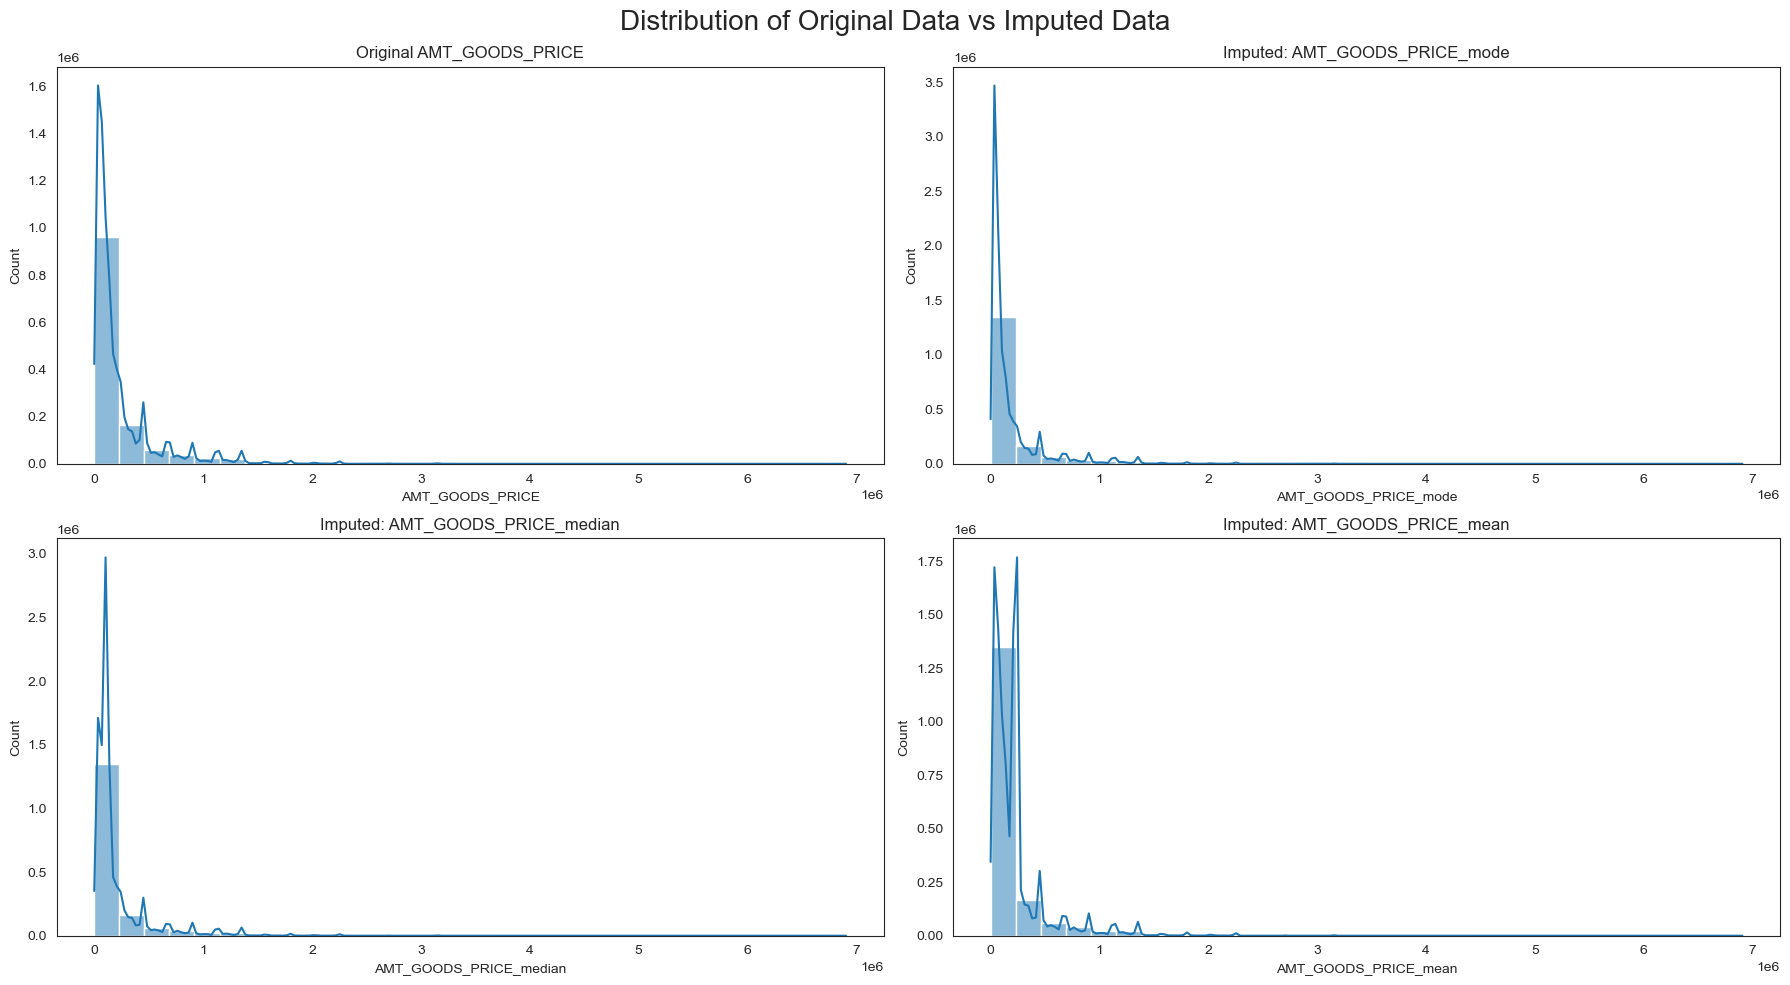

In [106]:
# Create new dataframe for "AMT_GOODS_PRICE" with columns imputed with mode, median and mean

statsDF = pd.DataFrame()
statsDF['AMT_GOODS_PRICE_mode'] = prev_appl['AMT_GOODS_PRICE'].fillna(prev_appl['AMT_GOODS_PRICE'].mode()[0])
statsDF['AMT_GOODS_PRICE_median'] = prev_appl['AMT_GOODS_PRICE'].fillna(prev_appl['AMT_GOODS_PRICE'].median())
statsDF['AMT_GOODS_PRICE_mean'] = prev_appl['AMT_GOODS_PRICE'].fillna(prev_appl['AMT_GOODS_PRICE'].mean())

cols = ['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median', 'AMT_GOODS_PRICE_mean']

# Plot distributions
plt.figure(figsize=(18, 10))
plt.suptitle('Distribution of Original Data vs Imputed Data', fontsize=20)

# Plot original data
plt.subplot(2, 2, 1)
sns.histplot(prev_appl['AMT_GOODS_PRICE'].dropna(), kde=True, bins=30)
plt.title("Original AMT_GOODS_PRICE")

# Plot imputed data
for idx, col in enumerate(cols, start=2):  # Correctly unpacking `enumerate()`
    plt.subplot(2, 2, idx)
    sns.histplot(statsDF[col], kde=True, bins=30)
    plt.title(f"Imputed: {col}")

plt.tight_layout()
plt.show()


The original distribution is closer with the distribution of data imputed with mode in this case, this will impute mode for missing values.

In [107]:
# Impute null value with Mode for column "AMT_GOODS_PRICE"

prev_appl['AMT_GOODS_PRICE'].fillna(prev_appl['AMT_GOODS_PRICE'].mode()[0], inplace = True)

### Imputing
- **CNT_PAYMENT:**	Term of previous credit at application of the previous application
- **NAME_CONTRACT_STATUS:**	Contract status (approved, cancelled, refused, unused offer) of previous application

In [181]:
# Need to check NAME_CONTRACT_STATUS categories where CNT_PAYMENT have null values

prev_appl.loc[prev_appl['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Approved        0
Canceled        0
Refused         0
Unused offer    0
Name: count, dtype: int64

In [182]:
# imputing null values as 0

prev_appl['CNT_PAYMENT'].fillna(0,inplace = True)

In [110]:
prev_appl.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'YEARLY_DECISION'], dtype='object')

In [111]:
prev_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 30 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   SK_ID_PREV                 1670214 non-null  int64   
 1   SK_ID_CURR                 1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE         1670214 non-null  object  
 3   AMT_ANNUITY                1670214 non-null  object  
 4   AMT_APPLICATION            1670214 non-null  float64 
 5   AMT_CREDIT                 1670213 non-null  float64 
 6   AMT_GOODS_PRICE            1670214 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE     1670214 non-null  object  
 8   NAME_CONTRACT_STATUS       1670214 non-null  object  
 9   DAYS_DECISION              1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE          1670214 non-null  object  
 11  CODE_REJECT_REASON         1670214 non-null  object  
 12  NAME_TYPE_SUITE            1670214 non-null  object  
 1

In [183]:
# Converting required categoical columns from Object to categorical 

p_catgorical = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE']

for col in p_catgorical:
    prev_appl[col]= pd.Categorical(prev_appl[col])

### Compute Outliers

In [113]:
prev_appl.describe()

SK_ID_PREV    SK_ID_CURR  AMT_APPLICATION    AMT_CREDIT  AMT_GOODS_PRICE  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count  1.670214e+06  1.670214e+06     1.670214e+06  1.670213e+06     1.670214e+06   1.670214e+06      1.670214e+06  1.670214e+06       997149.000000   997149.000000              997149.000000  997149.000000     997149.000000              997149.000000
mean   1.923089e+06  2.783572e+05     1.752339e+05  1.961140e+05     1.856429e+05   8.806797e+02      3.139511e+02  1.247621e+01       342340.056543    15949.224065               35163.363265   78152.730207      83505.775017                   0.332570
std    5.325980e+05  1.028148e+05     2.927798e+05  3.185746e+05     2.871413e+05   7.790997e+02      7.127443e+03  1.447588e+01        88413.495220    72007.270877              106405.950190  148833.342466     152484.418802                   0.471134
min    1.000001e+06  1.000010e+05     0.000000e+00  0.000000e+00     0.000000e+00   1.000000e+00     -1.000000e+00  0.000000e+00            2.000000        2.000000                   0.000000       2.000000          2.000000                   0.000000
25%    1.461857e+06  1.893290e+05     1.872000e+04  2.416050e+04     4.500000e+04   2.800000e+02     -1.000000e+00  0.000000e+00       365243.000000      475.000000                 257.000000     455.000000        447.000000                   0.000000
50%    1.923110e+06  2.787145e+05     7.104600e+04  8.054100e+04     7.105050e+04   5.810000e+02      3.000000e+00  1.000000e+01       365243.000000      921.000000                 741.000000    1155.000000       1171.000000                   0.000000
75%    2.384280e+06  3.675140e+05     1.803600e+05  2.164185e+05     1.804050e+05   1.300000e+03      8.200000e+01  1.600000e+01       365243.000000     1825.000000                1735.000000    2418.000000       2501.000000                   1.000000
max    2.845382e+06  4.562550e+05     6.905160e+06  6.905160e+06     6.905160e+06   2.922000e+03      4.000000e+06  8.400000e+01       365243.000000   365243.000000              365243.000000  365243.000000     365243.000000                   1.000000

- Find the difference between max and 75 percentile. There is no use to take max value to be so high.

In [114]:
prev_appl.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL YEARLY_DECISION
0     2030495      271877     Consumer loans     1730.43          17145.0     17145.0          17145.0                    XAP             Approved             73  Cash through the bank                XAP          Unknown         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0            42.0                      300.0           42.0              37.0                        0.0               1
1     2802425      108129         Cash loans   25188.615         607500.0    679671.0         607500.0                    XNA             Approved            164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0           134.0                      916.0       365243.0          365243.0                        1.0               1
2     2523466      122040         Cash loans   15060.735         112500.0    136444.5         112500.0                    XNA             Approved            301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0           271.0                       59.0       365243.0          365243.0                        1.0               1
3     2819243      176158         Cash loans   47041.335         450000.0    470790.0         450000.0                    XNA             Approved            512  Cash through the bank                XAP          Unknown         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0           482.0                      152.0          182.0             177.0                        1.0               2
4     1784265      202054         Cash loans   31924.395         337500.0    404055.0         337500.0                Repairs              Refused            781  Cash through the bank                 HC          Unknown         Repeater                 XNA           Cash           walk-in  Credit and cash offices                -1                  XNA         24.0             high         Cash Street: high                 NaN             NaN                        NaN            NaN               NaN                        NaN               3

In [115]:
prev_appl['AMT_ANNUITY'] = pd.to_numeric(prev_appl ['AMT_ANNUITY'],errors='coerce')

In [116]:
prev_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 30 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   SK_ID_PREV                 1670214 non-null  int64   
 1   SK_ID_CURR                 1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE         1670214 non-null  category
 3   AMT_ANNUITY                1297979 non-null  float64 
 4   AMT_APPLICATION            1670214 non-null  float64 
 5   AMT_CREDIT                 1670213 non-null  float64 
 6   AMT_GOODS_PRICE            1670214 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE     1670214 non-null  category
 8   NAME_CONTRACT_STATUS       1670214 non-null  category
 9   DAYS_DECISION              1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE          1670214 non-null  category
 11  CODE_REJECT_REASON         1670214 non-null  category
 12  NAME_TYPE_SUITE            1670214 non-null  object  
 1

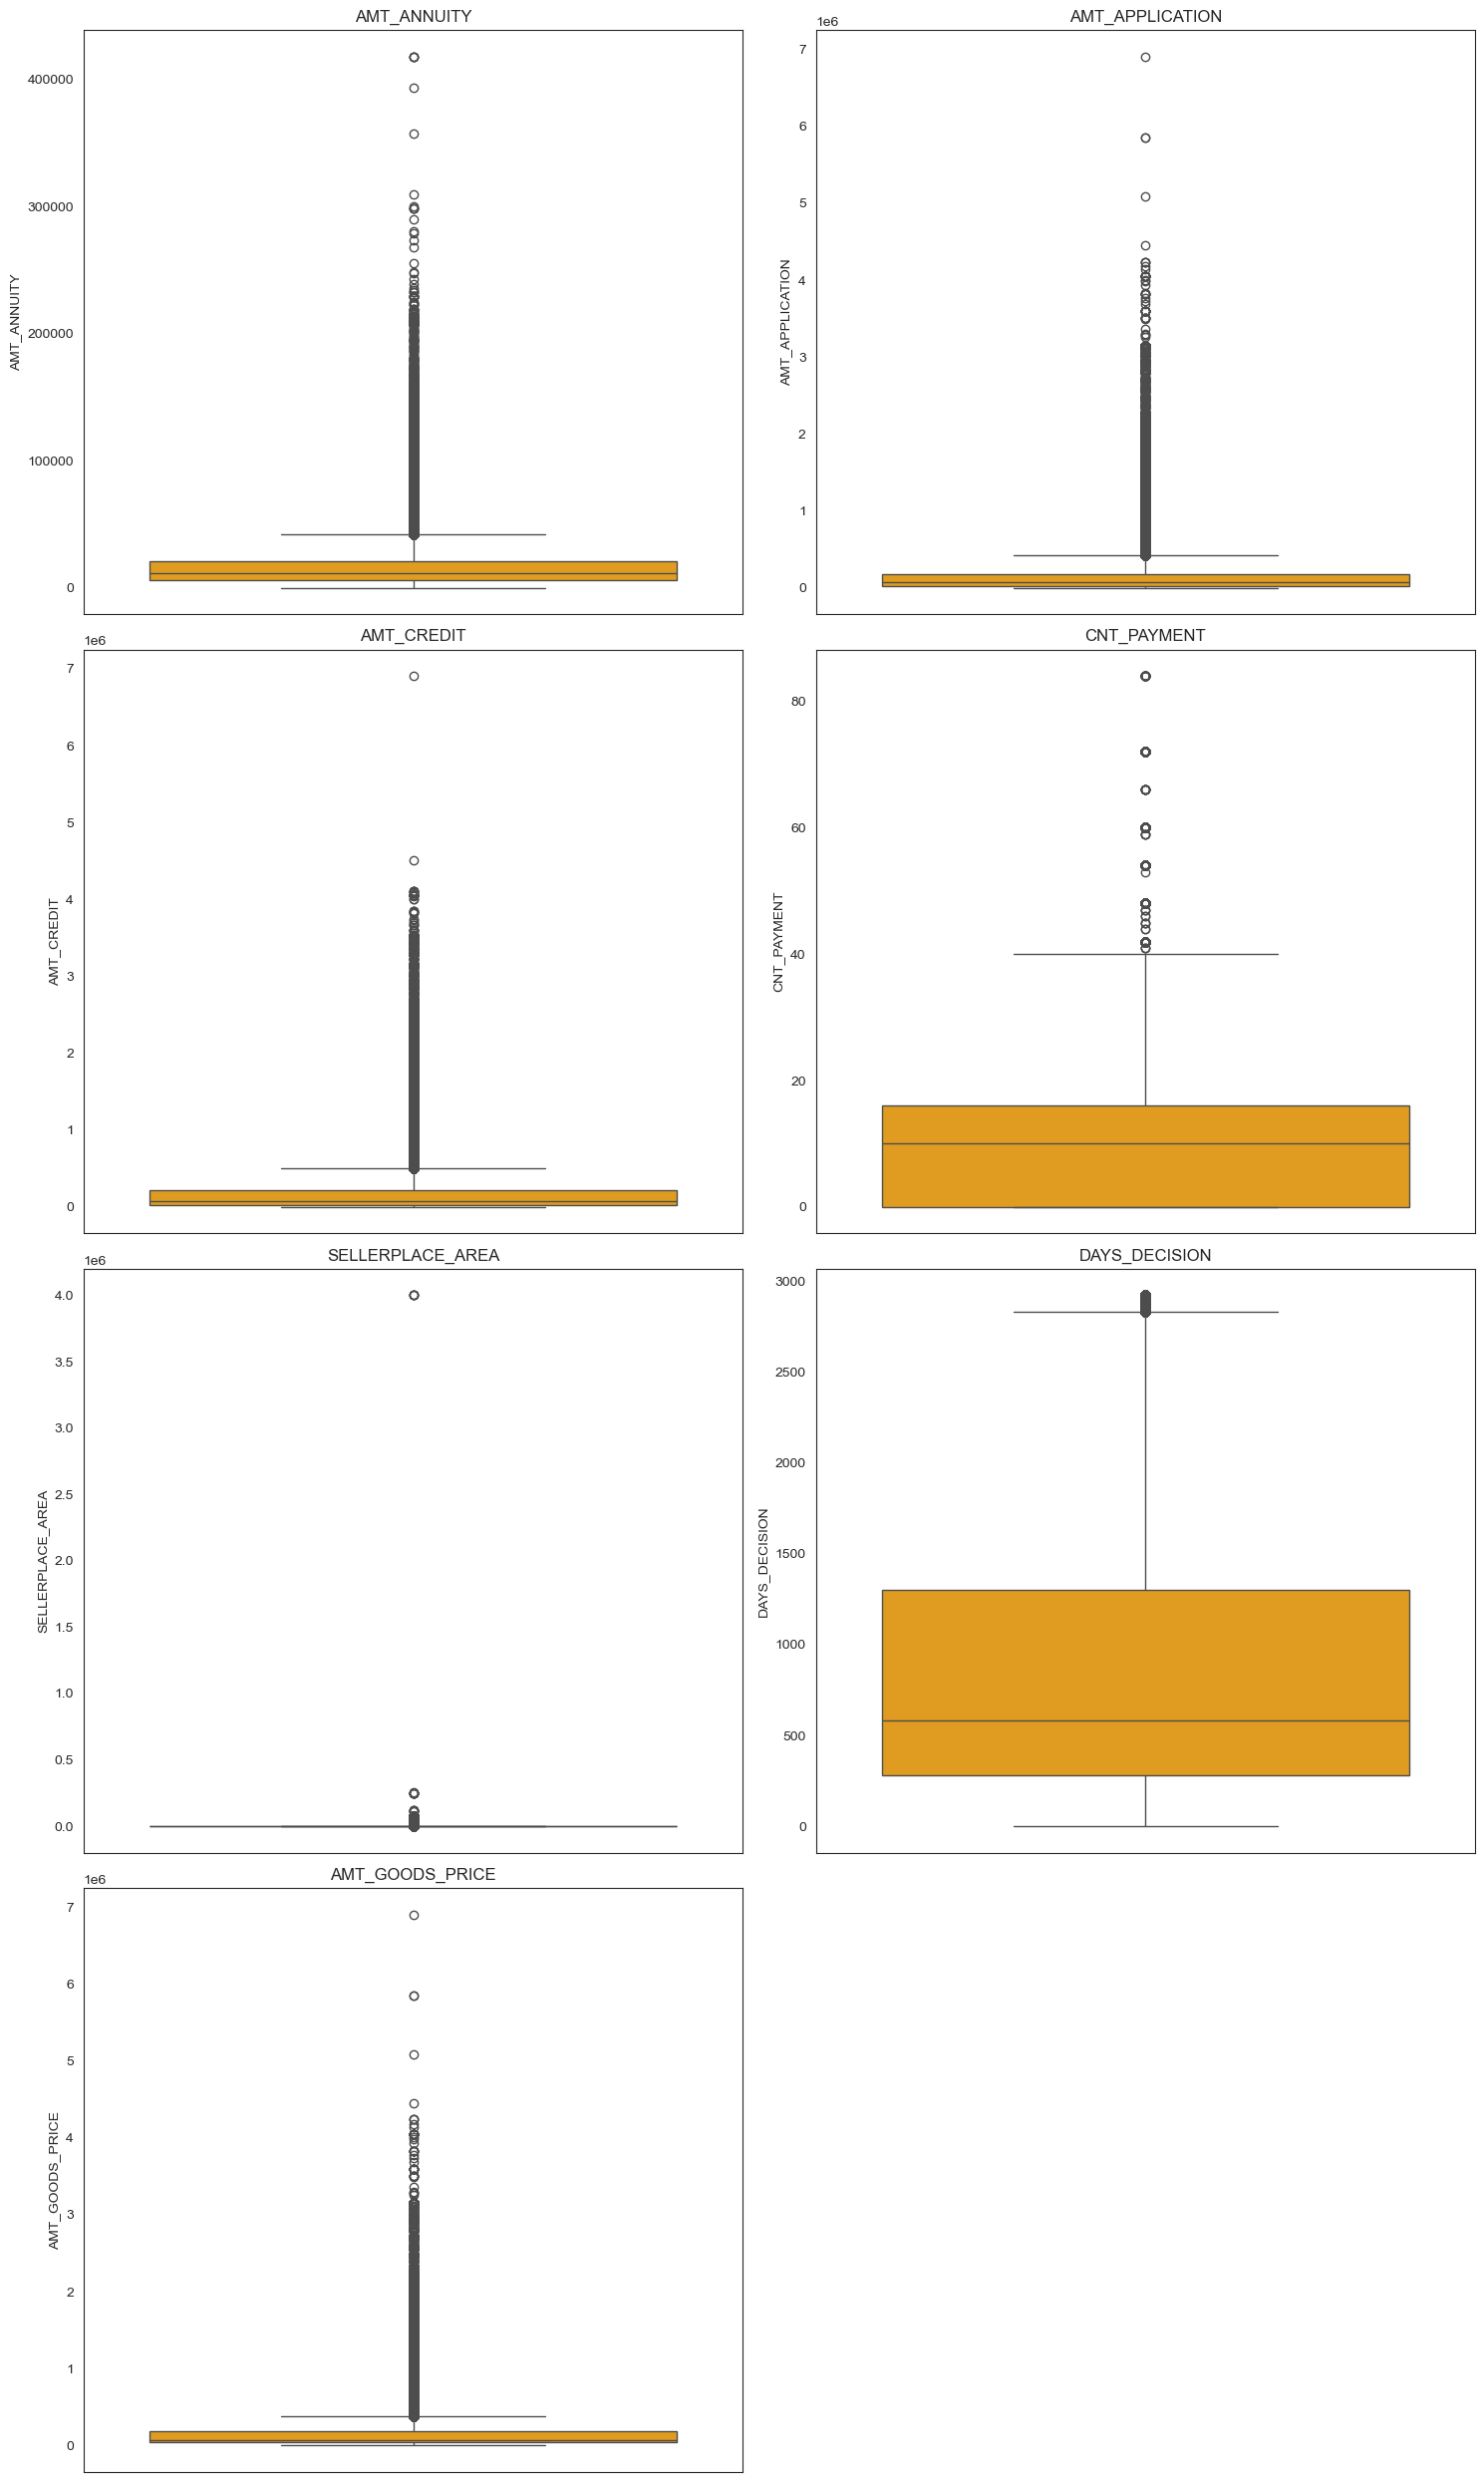

In [117]:
p_outlier_col = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'CNT_PAYMENT']

# Define 8 subplot positions
p_outlier_col = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'CNT_PAYMENT', 'SELLERPLACE_AREA', 'DAYS_DECISION', 'AMT_GOODS_PRICE', 'ANOTHER_COLUMN']

# Ensure only valid numeric columns exist
valid_cols = [col for col in p_outlier_col if col in prev_appl.columns and pd.api.types.is_numeric_dtype(prev_appl[col])]

plt.figure(figsize=[15, 25])

# Loop for available columns (max 8 subplots)
for j in range(8):
    plt.subplot(4, 2, j + 1)  # Ensures exactly 8 subplots (4 rows, 2 columns)
    
    if j < len(valid_cols):  # Check if we have enough columns
        sns.boxplot(y=prev_appl[valid_cols[j]].dropna(), orient="h", color="orange")
        plt.title(valid_cols[j])
    else:
        plt.axis("off")  # Hide empty subplot if there are fewer than 8 columns

plt.tight_layout()
plt.show()


### Findings
* **AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.**
* **CNT_PAYMENT has few outlier values.**
* **DAYS_DECISION has little number of outliers indicating that these previous applications decisions were taken long back.**

### Data Analysis Time
* Imbalance in Data
* Categorical Data Analysis
* Categorical segmented Univariate Analysis
* Categorical Bi/Multivariate analysis
* Numeric Data Analysis
* Bi-furcation of databased based on TARGET data
* Correlation Matrix
* Numerical segmented Univariate Analysis
* Numerical Bi/Multivariate analysis

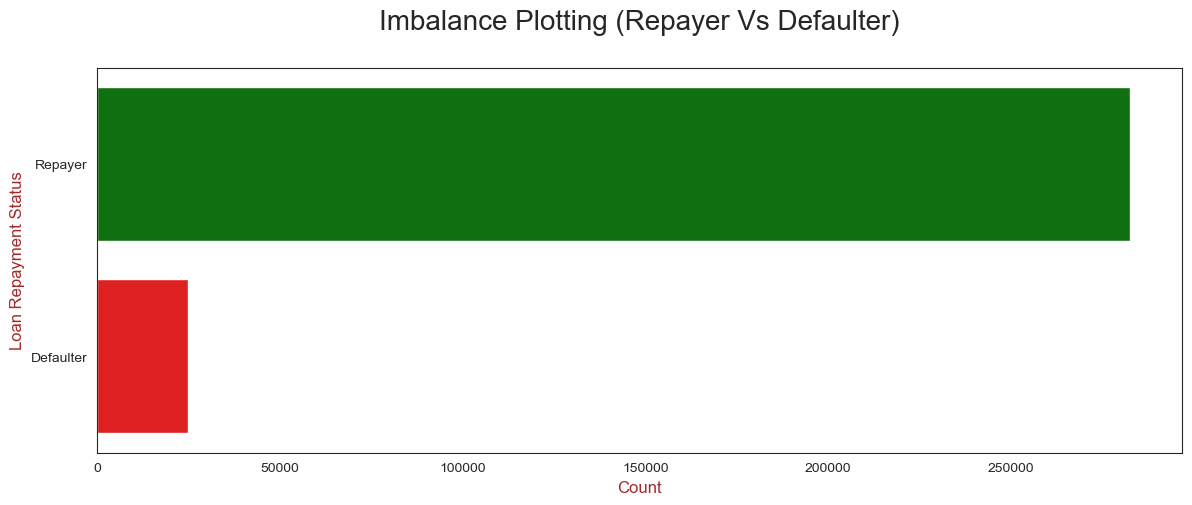

In [118]:
plt.figure(figsize= [14,5])
sns.barplot(y=['Repayer','Defaulter'], x= inp_appl['TARGET'].value_counts(), palette=['g','r'])
plt.title("Imbalance Plotting (Repayer Vs Defaulter)\n",fontdict={"fontsize":20,"fontweight":5})
plt.xlabel("Count", fontdict={"fontsize":12,"fontweight":5,"color":"brown"})
plt.ylabel("Loan Repayment Status", fontdict={"fontsize":12,"fontweight":5,"color":"brown"})
plt.show()

In [184]:
# Ratio of imbalance percentage of defaulter and repayer is given below 

repayer = round((inp_appl['TARGET'].value_counts()[0]/len(inp_appl)*100),2)
print('Repayer Percentage is {}%'.format(repayer))
defaulter = round((inp_appl['TARGET'].value_counts()[1]/len(inp_appl)*100),2)
print('Defaulter Percentage is {}%'.format(defaulter))
print('Imblance Ratio with respect to Repayer and Defaulter is : {0:.2f}/1'.format(repayer/defaulter))

Repayer Percentage is 91.93%
Defaulter Percentage is 8.07%
Imblance Ratio with respect to Repayer and Defaulter is : 11.39/1


### Plotting Functions

Using create a function of univariate analysis.
This function will create two plots
1. Count plot of given column w.r.t TARGET column
2. Percentage of defaulters within that column

Initializing 6 arguments
1. dataset : to put the dataset we want to use
2. col : column name for which we need to the analysis
3. target_col : column name for with which we will be comparing
4. ylog : to have y-axis in log10 terms, in case the plot is not readable
5. x_label_angle : to maintain the orientation of x-axis labels
6. h_layout : to give horizontal layout of the subplots

In [120]:
# Make function if the column is categorical or numerical 

# Function to check data type
def data_type(dataset, col):
    if dataset[col].dtype == np.int64 or dataset[col].dtype == np.float64:
        return "numerical"
    if dataset[col].dtype == "category" or dataset[col].dtype == "object":
        return "categorical"

# Creating a function "univariate" to perform analysis 
def univariate(dataset, col, target_col, ylog=False, x_label_angle=False, h_layout=True):
    if data_type(dataset, col) == "numerical":
        sns.histplot(dataset[col], kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()
        
    elif data_type(dataset, col) == "categorical":
        val_count = dataset[col].value_counts()
        df1 = pd.DataFrame({col: val_count.index, 'count': val_count.values})

        # Calculating % of Defaulters (TARGET = 1)
        target_1_percentage = dataset[[col, target_col]].groupby([col], as_index=False).mean()
        target_1_percentage[target_col] = target_1_percentage[target_col] * 100
        target_1_percentage.sort_values(by=target_col, inplace=True)

        # Define layout of subplots
        if h_layout:
            fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))
        else:
            fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 12))

        # 1. Subplot for Count Plot
        s = sns.countplot(ax=ax1, x=col, data=dataset, hue=target_col, palette=["g", "r"])
        ax1.set_title(col, fontsize=20)
        ax1.legend(['Repayer', 'Defaulter'])
        ax1.set_xlabel(col, fontdict={'fontsize': 15, 'fontweight': 3})

        if x_label_angle:
            s.set_xticklabels(s.get_xticklabels(), rotation=75)

        # 2. Subplot for Percentage of Defaulters
        s = sns.barplot(ax=ax2, x=col, y=target_col, data=target_1_percentage, palette="Blues")
        ax2.set_title(f"Defaulters % in {col}", fontsize=20)
        ax2.set_xlabel(col, fontdict={'fontsize': 15, 'fontweight': 3})
        ax2.set_ylabel("Defaulter %", fontdict={'fontsize': 15, 'fontweight': 3})

        if x_label_angle:
            s.set_xticklabels(s.get_xticklabels(), rotation=75)

        # Apply log scale if needed
        if ylog:
            ax1.set_yscale('log')
            ax1.set_ylabel("Count (log)", fontdict={'fontsize': 15, 'fontweight': 3})
        else:
            ax1.set_ylabel("Count", fontdict={'fontsize': 15, 'fontweight': 3})

        plt.tight_layout()
        plt.show()


In [187]:
# Function for plotting repetitive plots in bivaritae numerical analysis

def bivariate_n(x,y,df,hue,kind,labels):
    plt.figure(figsize=[15,15])
    sns.relplot(x=x, y=y, data=df, hue=hue,kind=kind,legend = False)
    plt.legend(labels=labels)
    plt.xticks(rotation=45, ha='right')
    plt.show()


In [186]:
# Function for plotting repetitive barplots in bivariate categorical analysis

def bivariate_c(x,y,df,hue,figsize,labels):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,y=y,data=df, hue=hue)     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontsize = 15)    
    plt.ylabel(y,fontsize = 15)    
    plt.title(col,fontsize = 20) 
    plt.xticks(rotation=45, ha='right')
    plt.legend(labels = labels )
    plt.show()

In [185]:
# Function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_c_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, data=df,hue= hue,palette= palette,order=df[col].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontsize=15)     
    else:
        plt.ylabel("Count",fontsize=15)       

    plt.title(col , fontsize=20) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=45, ha='right')
    
    plt.show()


In [124]:
# Function to plot point plots 

def pointplot(df,hue,x,y):
    plt.figure(figsize=(12,6))
    sns.pointplot(x=x, y=y, hue=hue, data=df)
    plt.title(x+" VS "+y,fontsize = 15)


In [125]:
# storing numerical and categorical columns as list in belows varibles

cat_col = list(inp_appl.select_dtypes(["category"]).columns)   
num_col = list(inp_appl.select_dtypes(["int","float"]).columns)  

## Categorical Variables Analysis

- Segmented Univariate Analysis

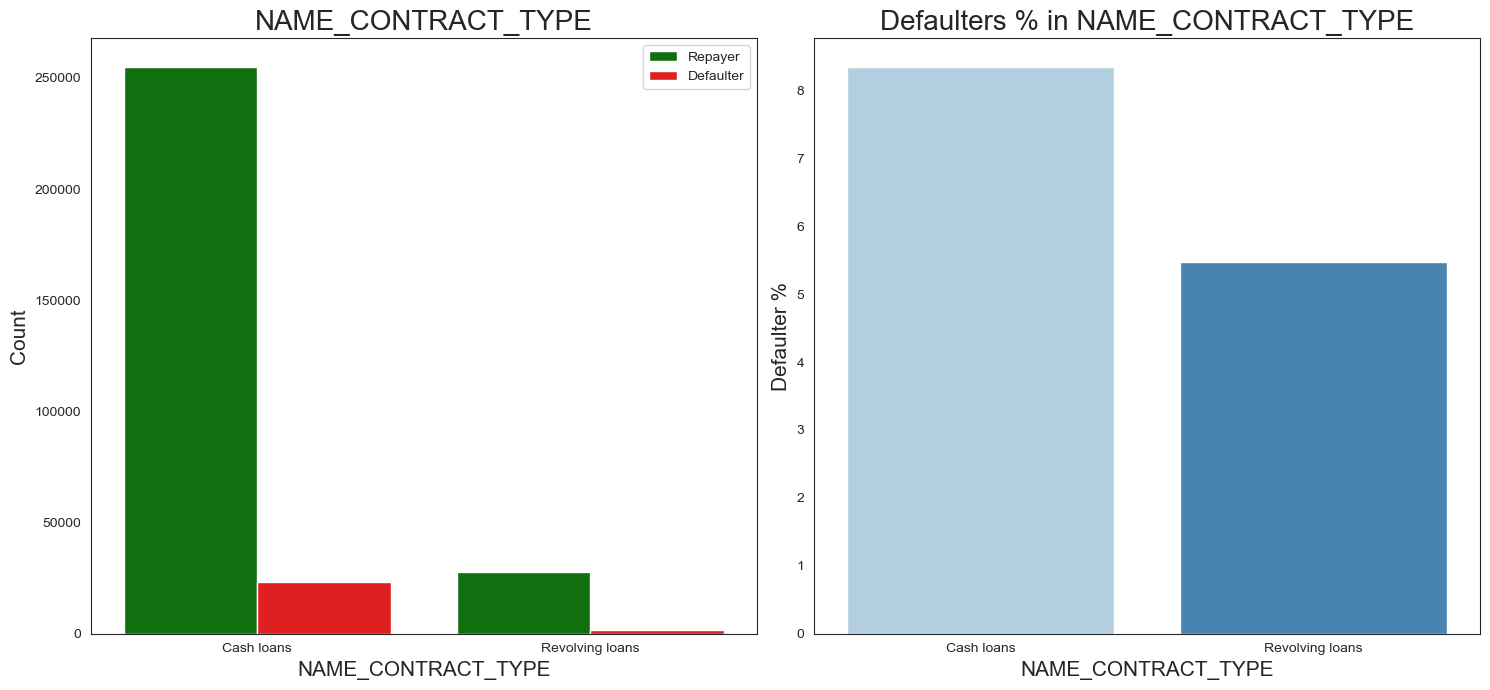

In [188]:
# Checking the contract type based on loan repayment status

univariate(inp_appl,"NAME_CONTRACT_TYPE","TARGET",False,False,True)

* **Capturing ony 10% revolving loans from the total number of loans**
* **5-6% revolving loan applicant are in defaulters and around 8-9 % case loan applicants.**


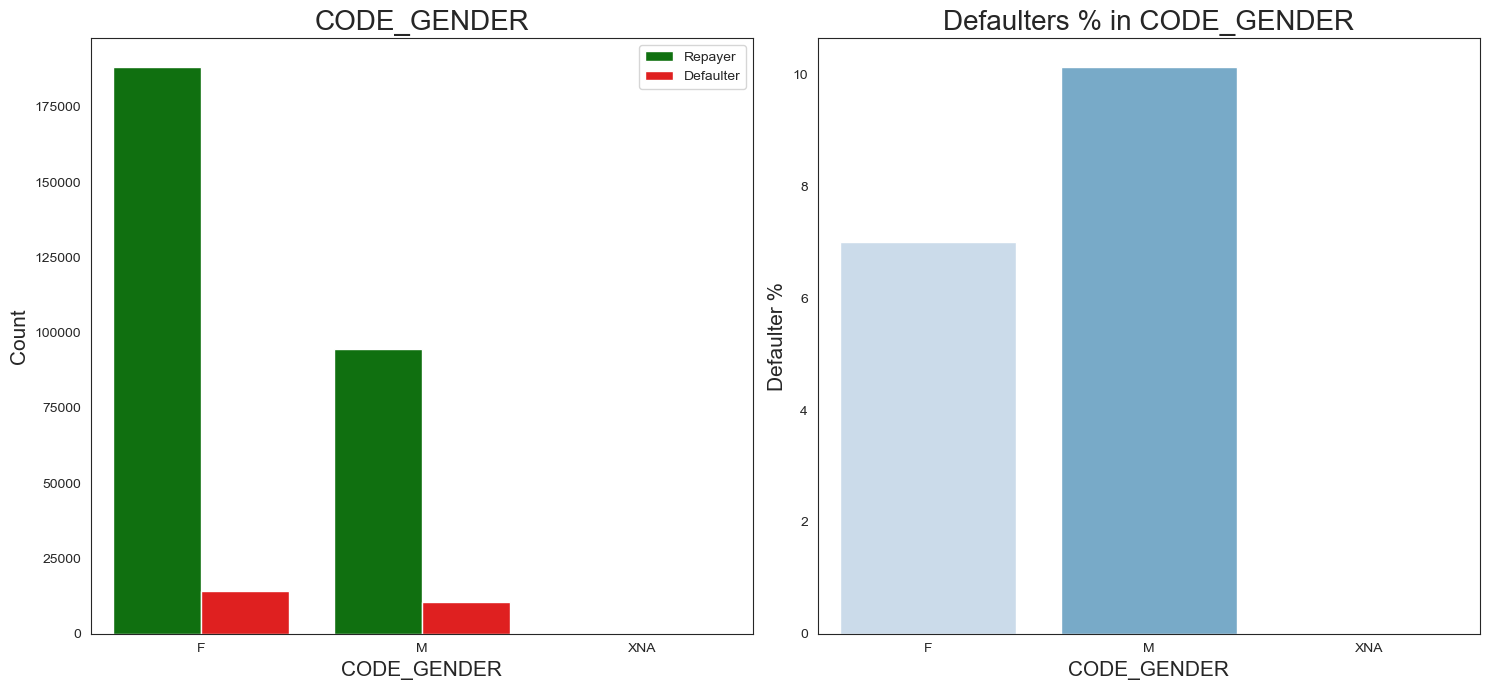

In [190]:
# Loan repayment status for  Gender

univariate(inp_appl,"CODE_GENDER","TARGET",False,False,True)

- The number of female client is almost double from number of male client
- While analysing the Defaulter graph, Males are having higher chance to not returning the loan about 10% and for female chance is 7%

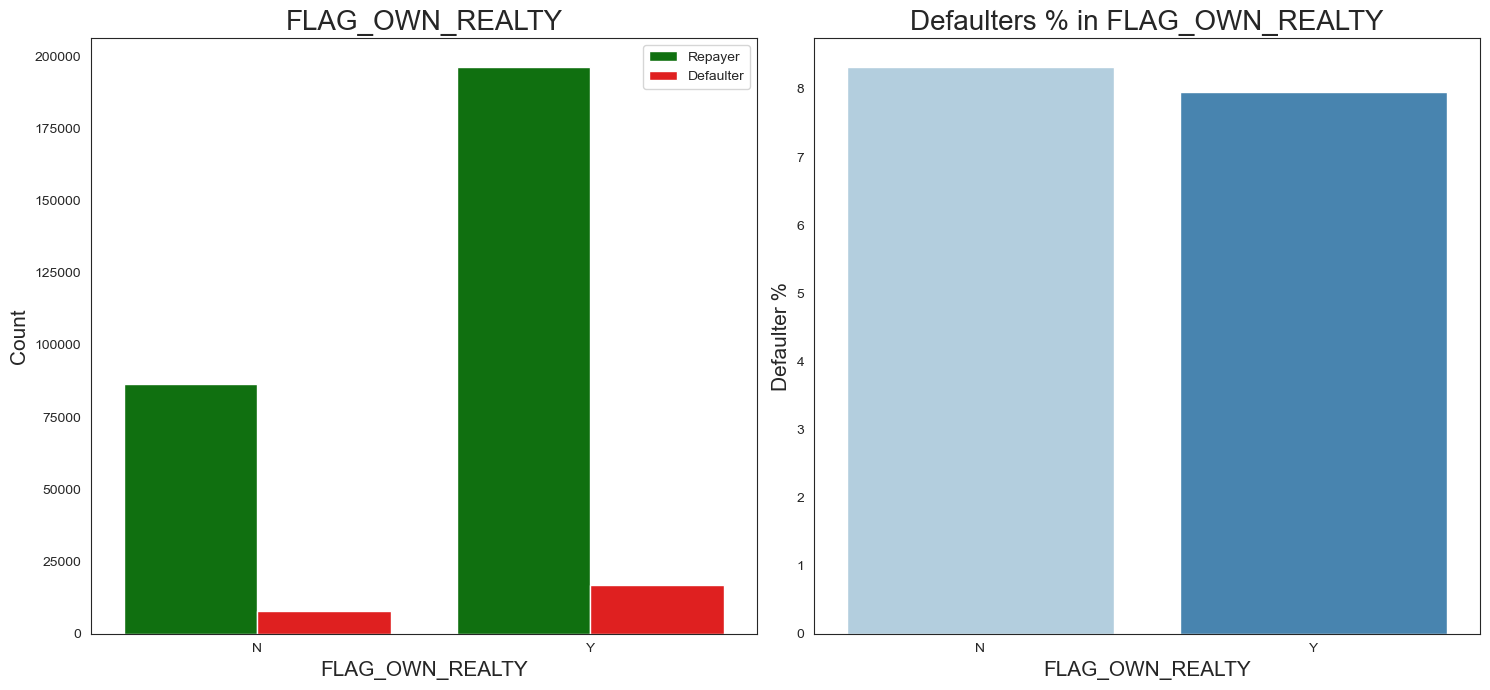

In [189]:
# Checking if client owns a house or flat is related to loan repayment status

univariate(inp_appl,"FLAG_OWN_REALTY","TARGET",False,False,True)

- Maximumn Client is having their own house as compared to who doesn't have.

- Same Percentage of defaulter which is 8% and it conclude that there is no correlation between owning a reality and defaulter the loan.

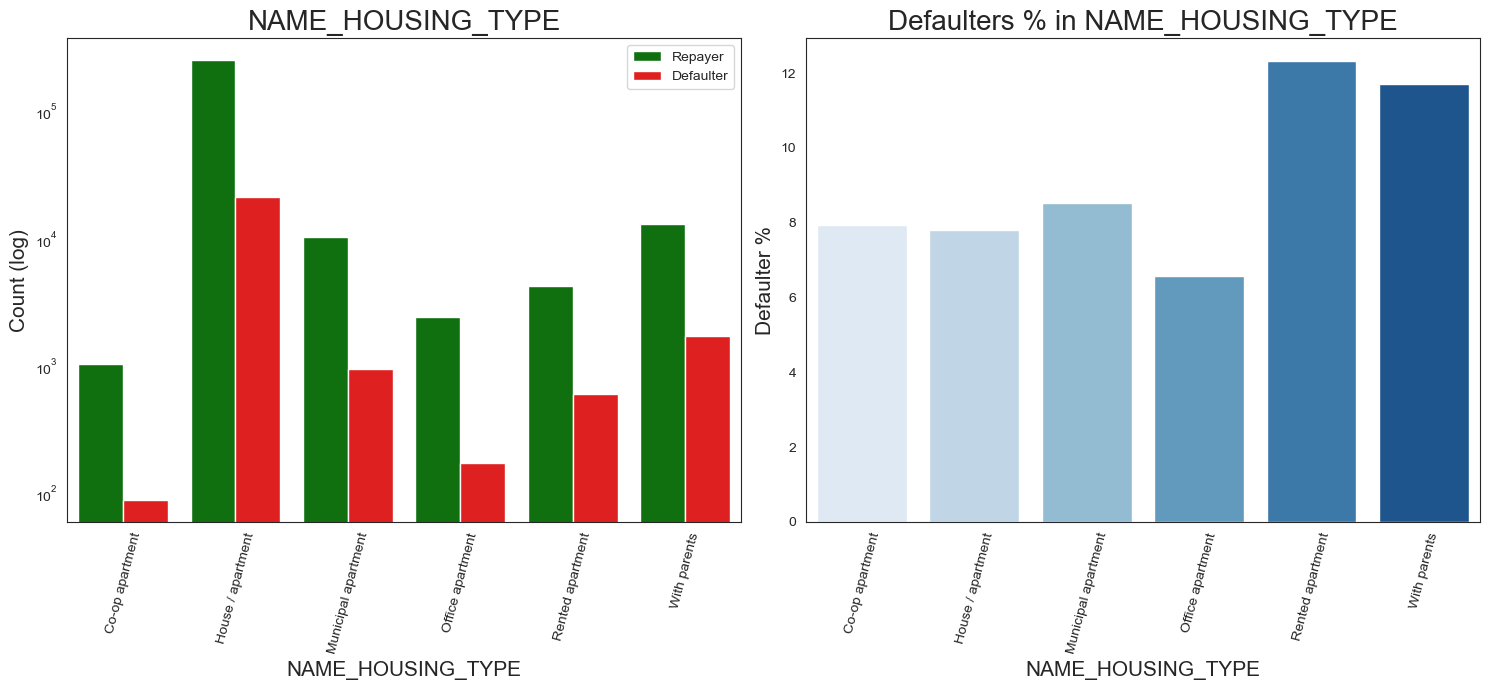

In [129]:
# Checking type of hours based on loan repayment status

univariate(inp_appl,"NAME_HOUSING_TYPE","TARGET",True,True,True)

- House/Apartment is high range which people live.
- Clients living in "Rented Apartment" (>12%) and living with parents (near by 11%) are having higher probability of defaulting.

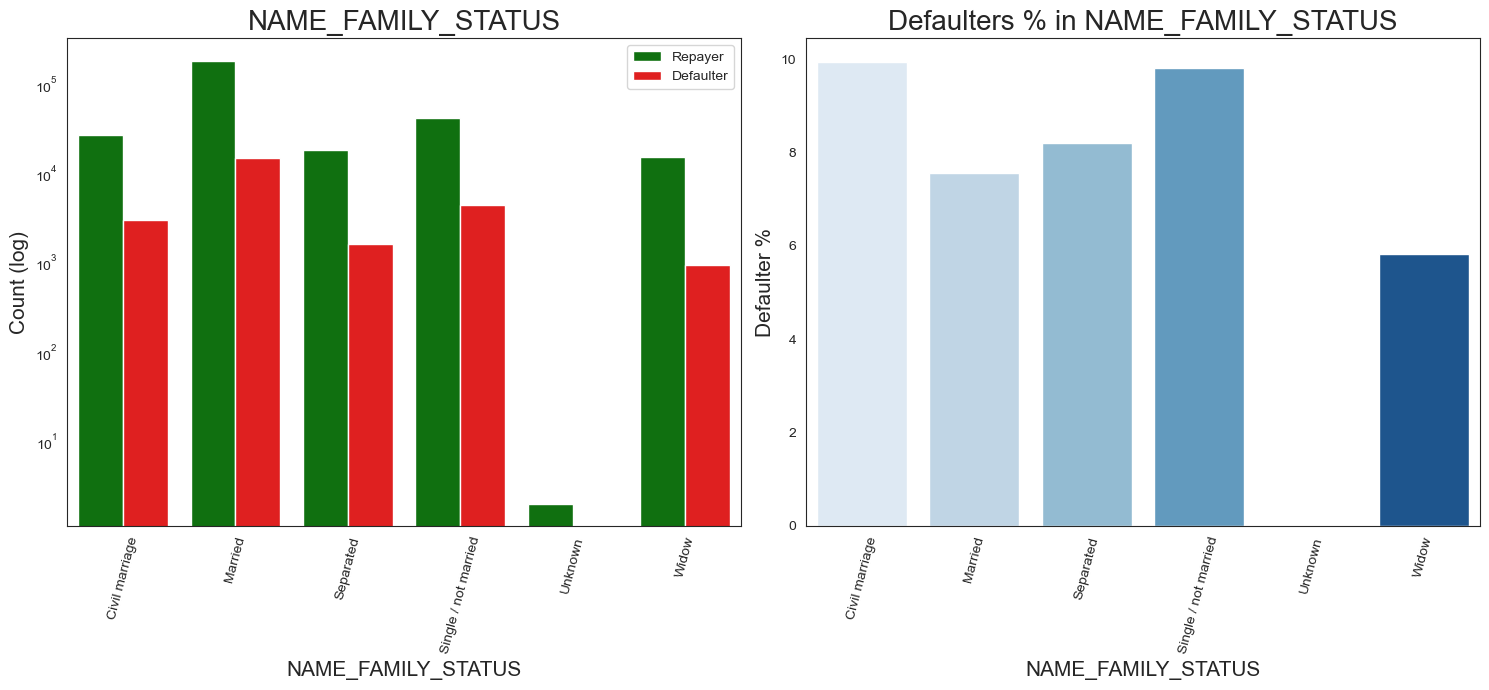

In [130]:
# Family Status based on loan repayment status

univariate(inp_appl,"NAME_FAMILY_STATUS","TARGET",True,True,True)

- Majority of people who have taken loan are married and rest of single/not married, civil marriage.
- Civil Marriage has high percent which is 10% to be defaulter and lowest is widow which is around 6 %.

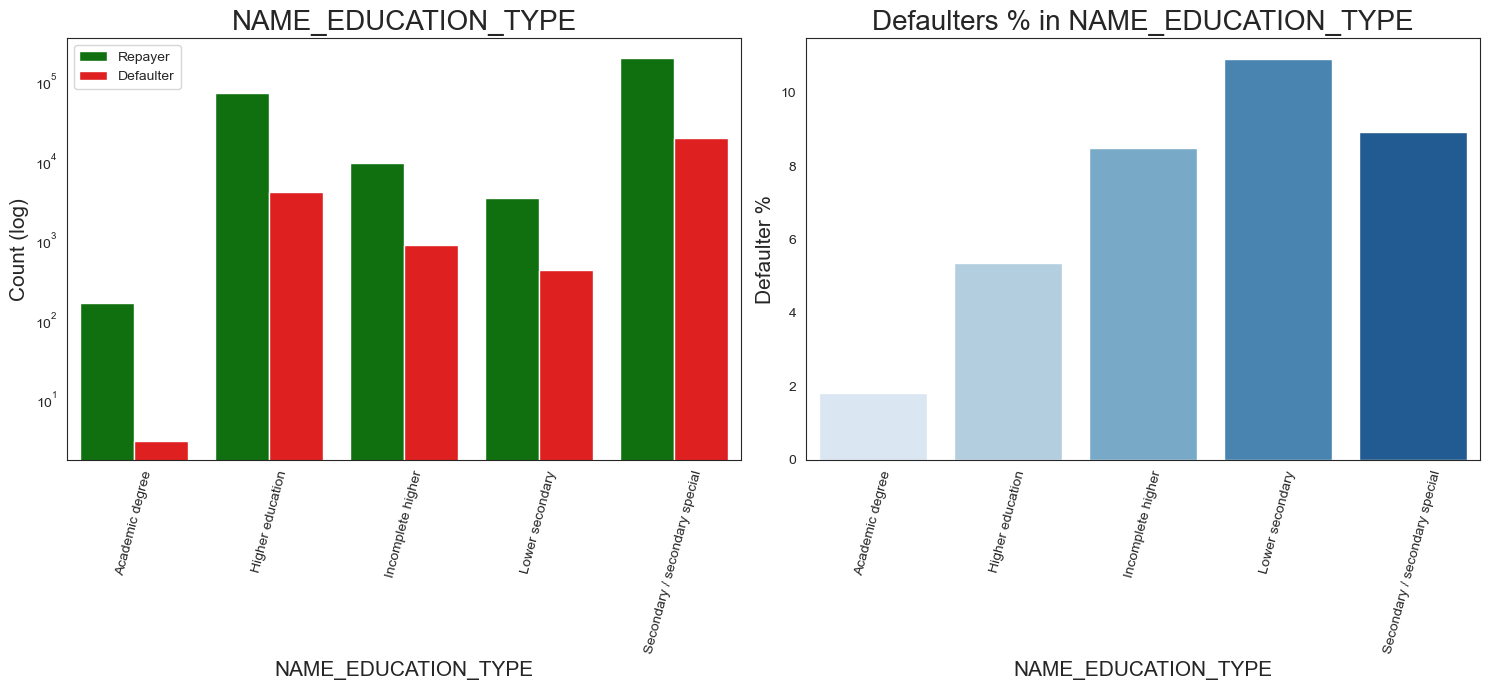

In [131]:
# Education type based loan repayment status

univariate(inp_appl,"NAME_EDUCATION_TYPE","TARGET",True,True,True)

- Maximum client have secondary/secondary special education.
- Less client have an Academic Degree.
- Lower Secondary category has high percent of defaulter.
- Academic Degree has lower percent of defaulter.

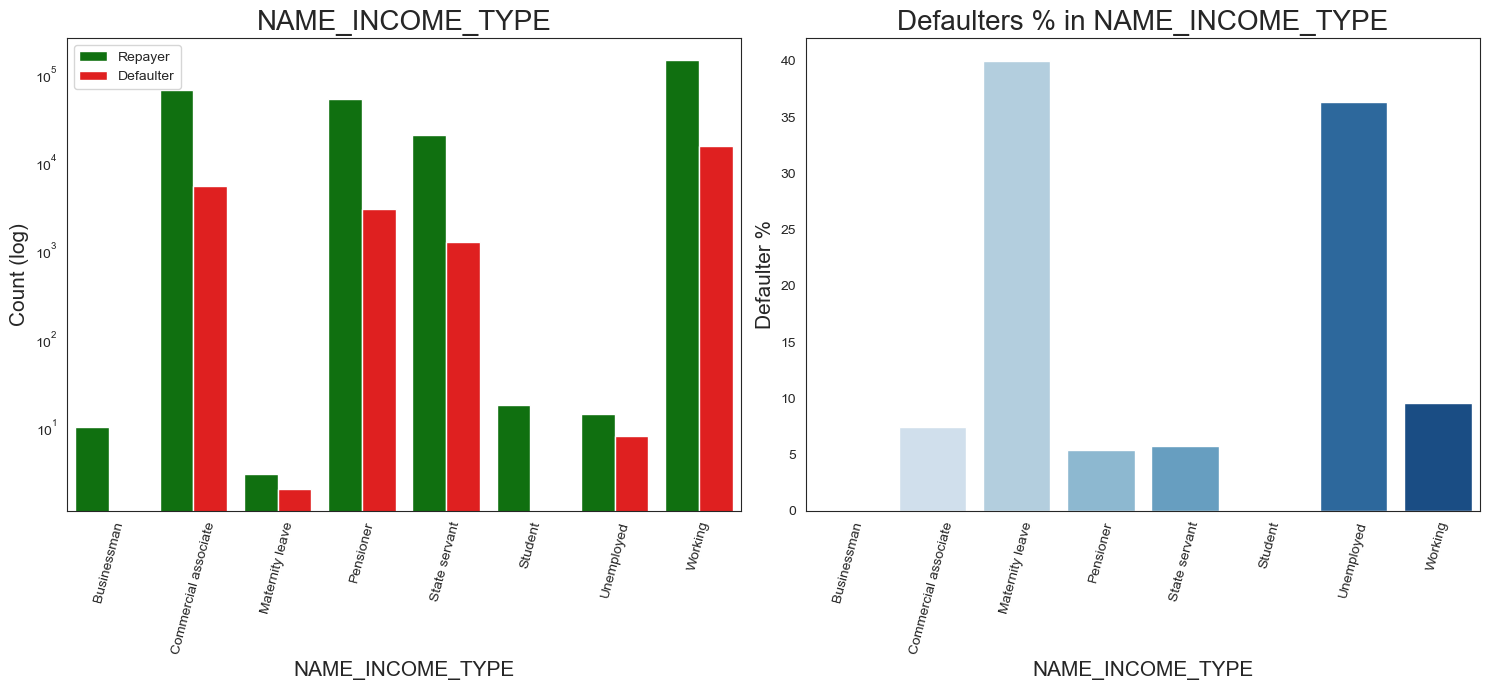

In [132]:
# Income Type Based on loan Repayment status

univariate(inp_appl,"NAME_INCOME_TYPE","TARGET",True,True,True)

- Most of applicant for loans income type is working.
- Maternity leave has high percentage of defaulter which is around 40 % and second category is unemployed around 37% and rest of category have average 10% of defaulter.
- Student and Businessman do not have defaulter record.



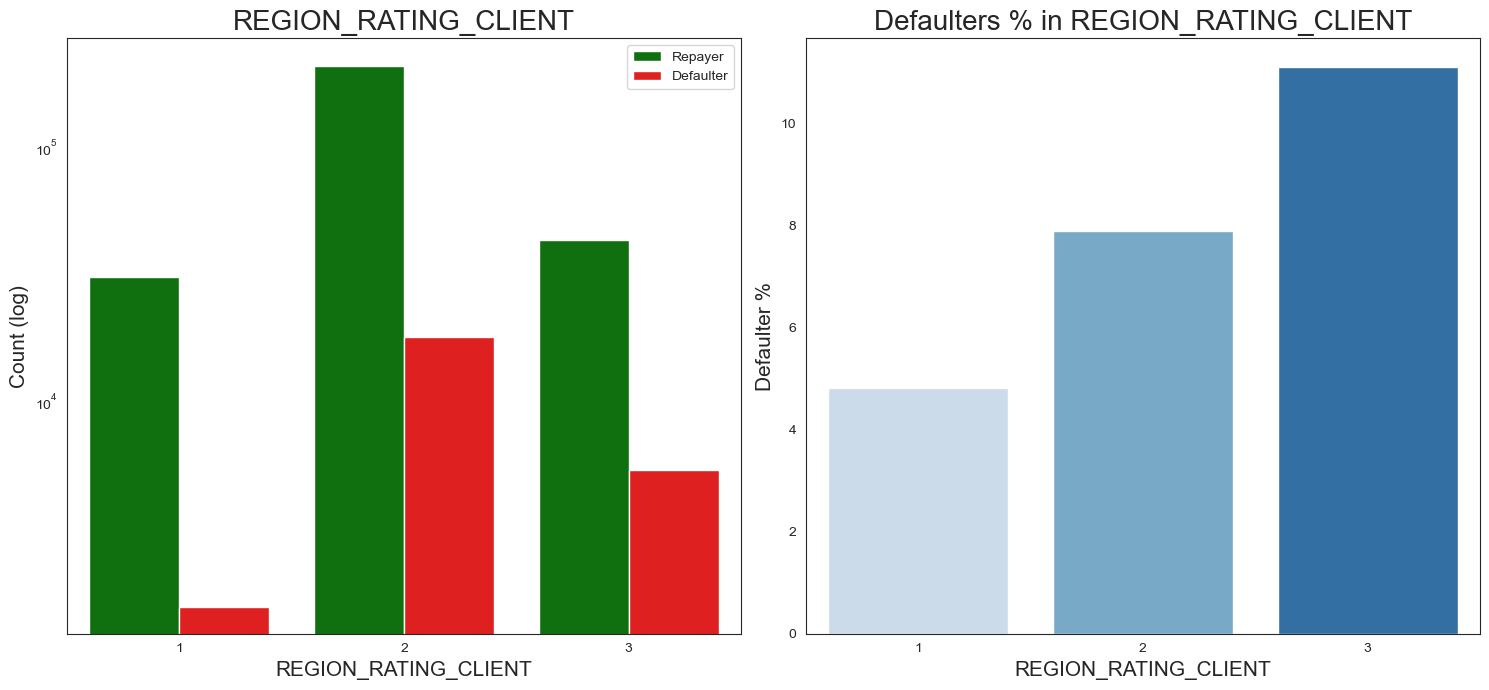

In [133]:
# Region rating where applicant lives based on loan repayment status

univariate(inp_appl,"REGION_RATING_CLIENT","TARGET",True,False,True)

- Most of the applicants are living in region with Rating 2 Place.
- High Percentage of defaulter is in Region Rating 3 which is round 11 %.
- Applicant living in Region_Rating 1 has the lowest probability of defaulting which conclude that is is safer for approving loans.

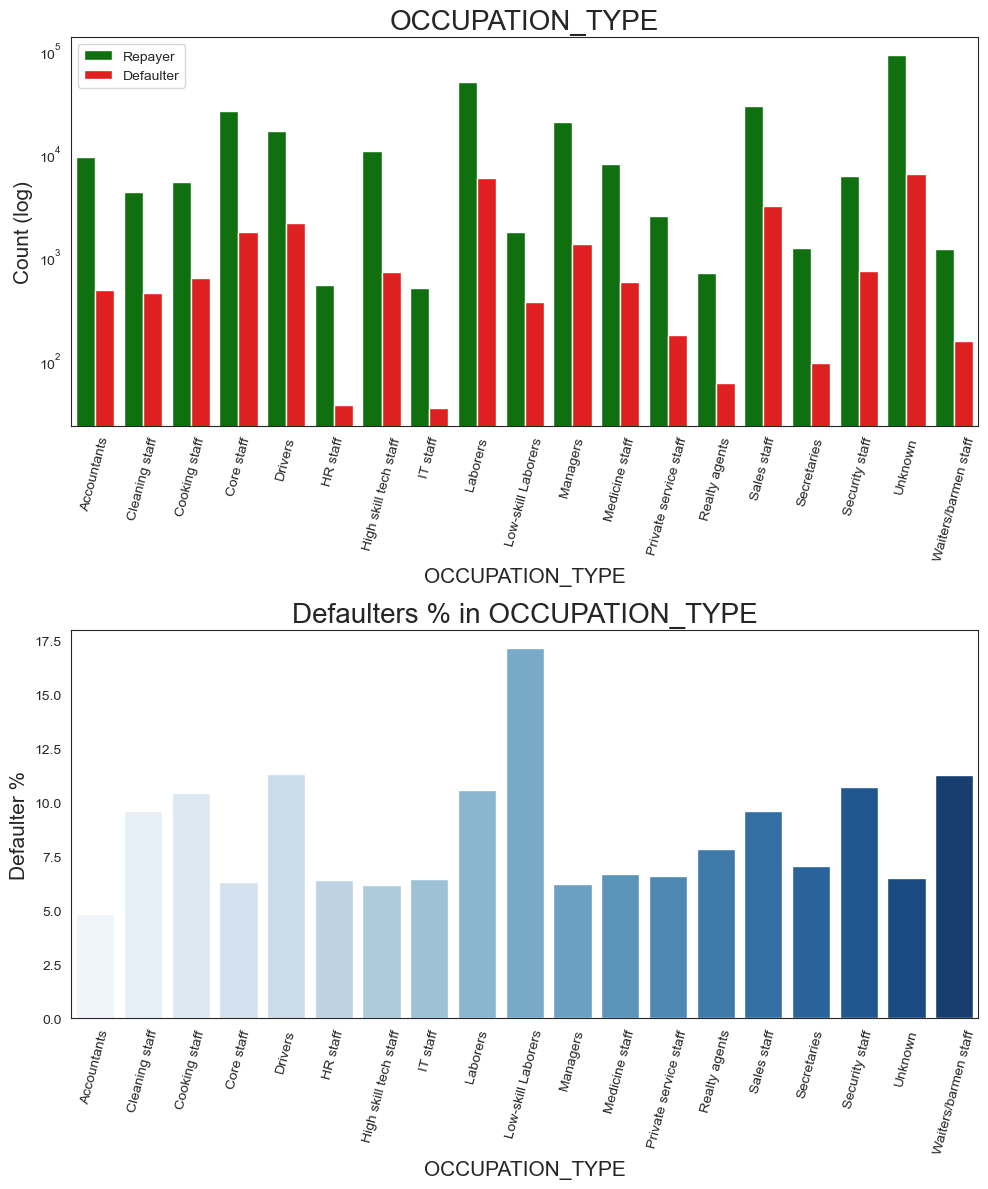

In [134]:
# Occupation Type where applicant lives based on loan repayment status
univariate(inp_appl,"OCCUPATION_TYPE","TARGET",True,True,False)

* Majority loans are taken by Laborers, followed by Sales staff.
* IT staff are less likely to apply for Loan.
* Category with highest percent of defautess are Low-skill Laborers around 17% followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.

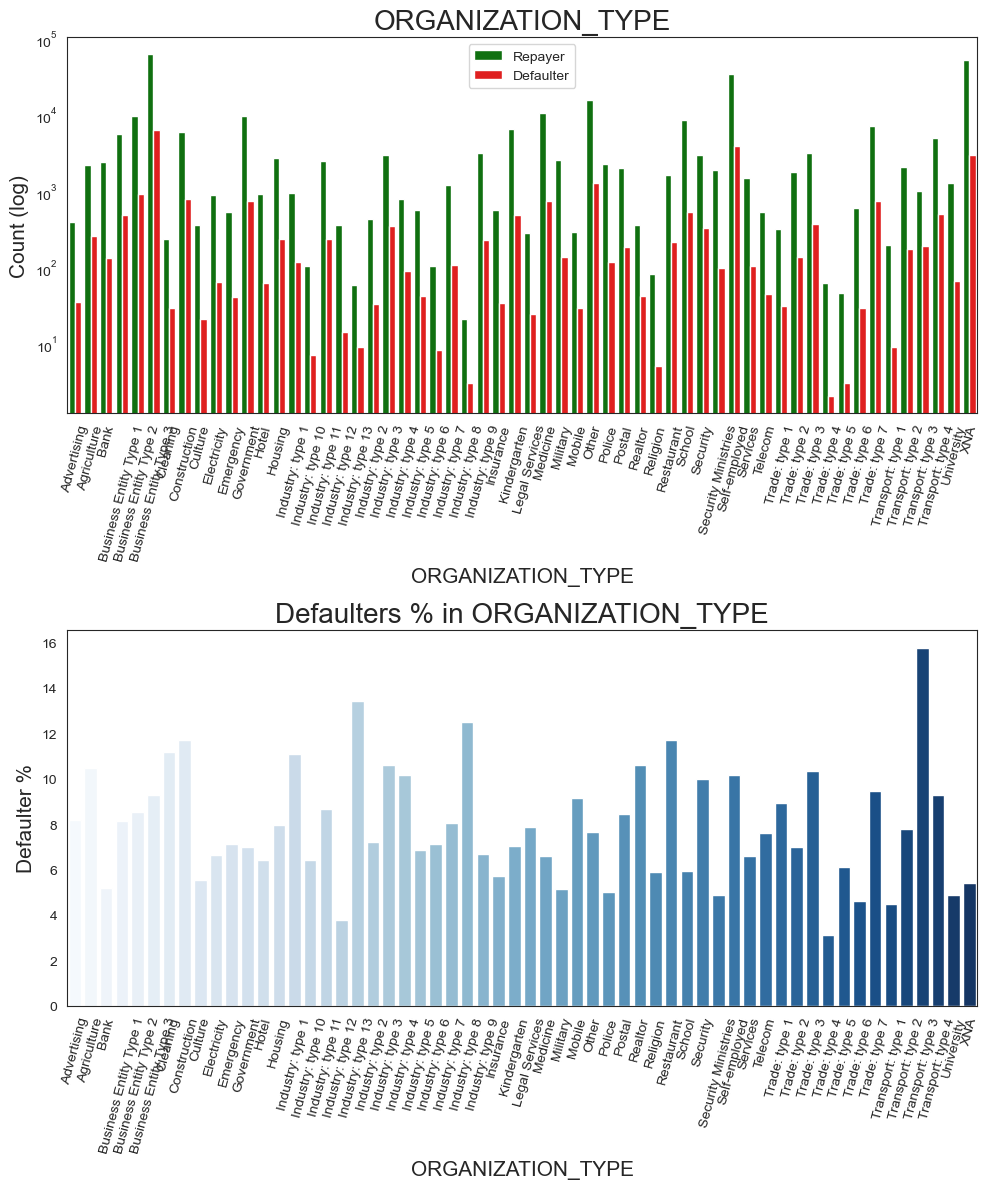

In [135]:
# Organization type based loan repayment

univariate(inp_appl,"ORGANIZATION_TYPE","TARGET",True,True,False)

- Most of the people application for loan are from Business Entity Type 3.
- For a very high number of applications, Organization type information is unavailable(XNA).
- Higher Defaulter are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%).
- Self employed people have high defauting rate.

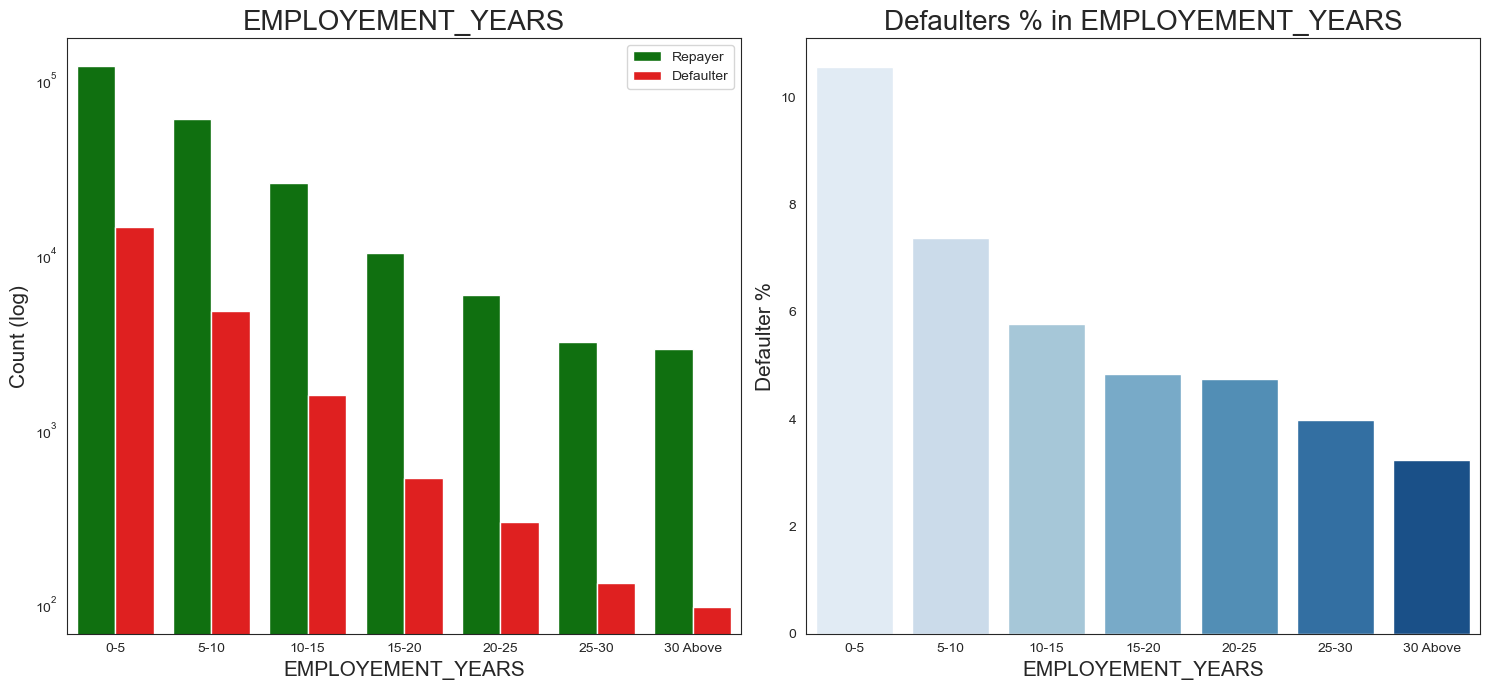

In [136]:
# Employment_Year based on loan repayment status
univariate(inp_appl,"EMPLOYEMENT_YEARS","TARGET",True,False,True)

- Majority of the applicant have working experience b/w 0-5 year are defaulters. High Percentage of defaulting rating of this group.
- Increasing Employment Year decreases defaulter rate.
- 30 + Employment year have less chances of defaulters.

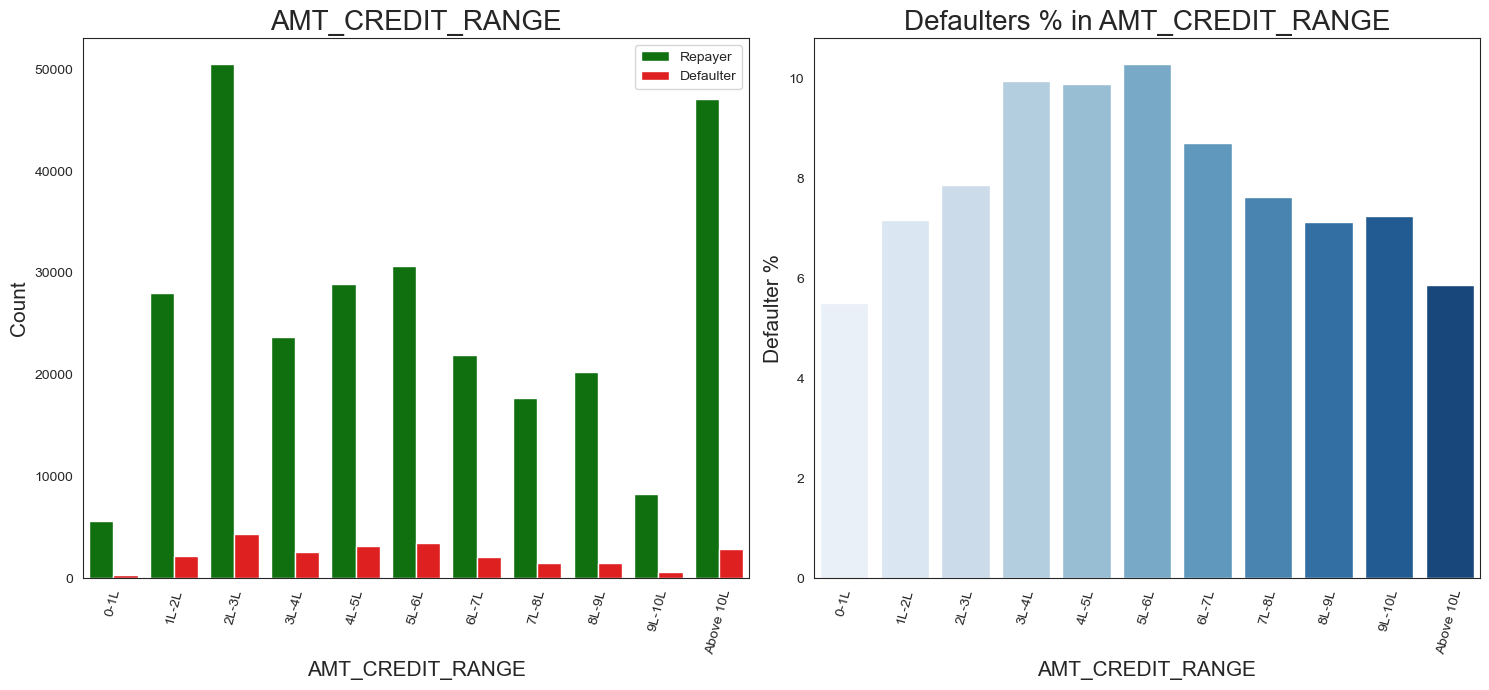

In [137]:
#  Amount_Credit based on loan repayment status
univariate(inp_appl,"AMT_CREDIT_RANGE","TARGET",False,True,True)

- High nuumber of applicants have loan in range of 2-3 lakhs.
- 3-6 lakhs are having high number defaulter than other loan range.

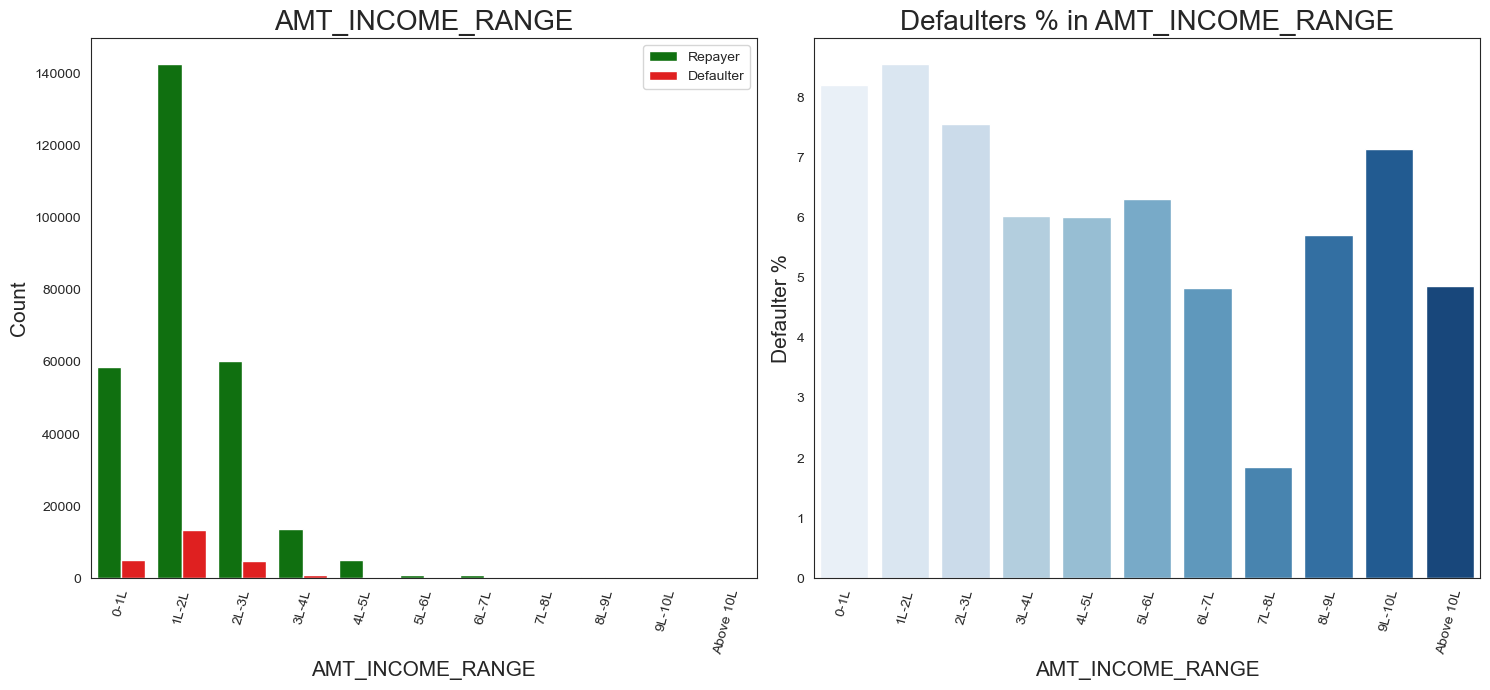

In [138]:
# Amount_Income Range based on loan repayment status

univariate(inp_appl,"AMT_INCOME_RANGE","TARGET",False,True,True)

- Majority of the applicant have income total less than 3 lakhs.
- High percentage of defaulter have income less than 3 lakhs.
- Less number of defaulter in income range of 7-8 lakhs.

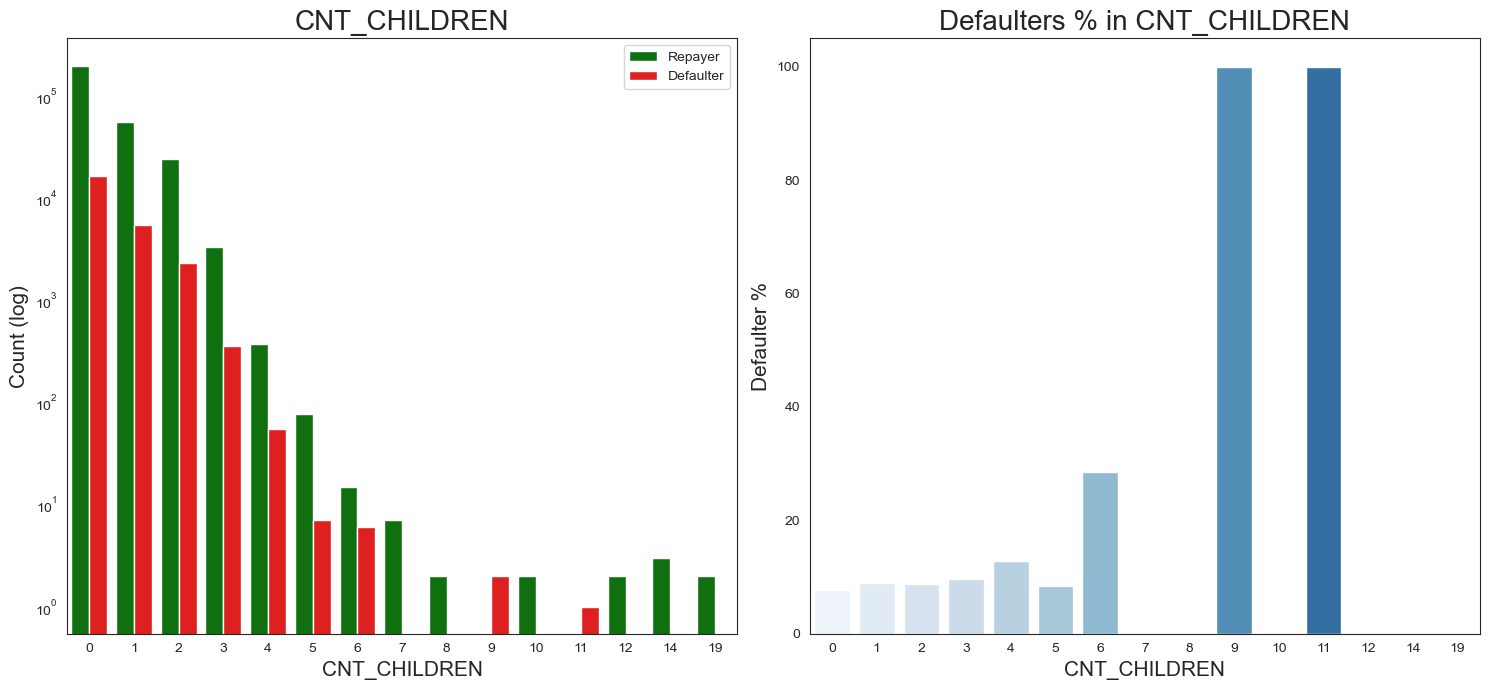

In [139]:
# Number of children based on loan repayment status

univariate(inp_appl,"CNT_CHILDREN","TARGET",True,False,True) # Client Children's Count


- Child count 9 and 11 are showing 100% of default rate.

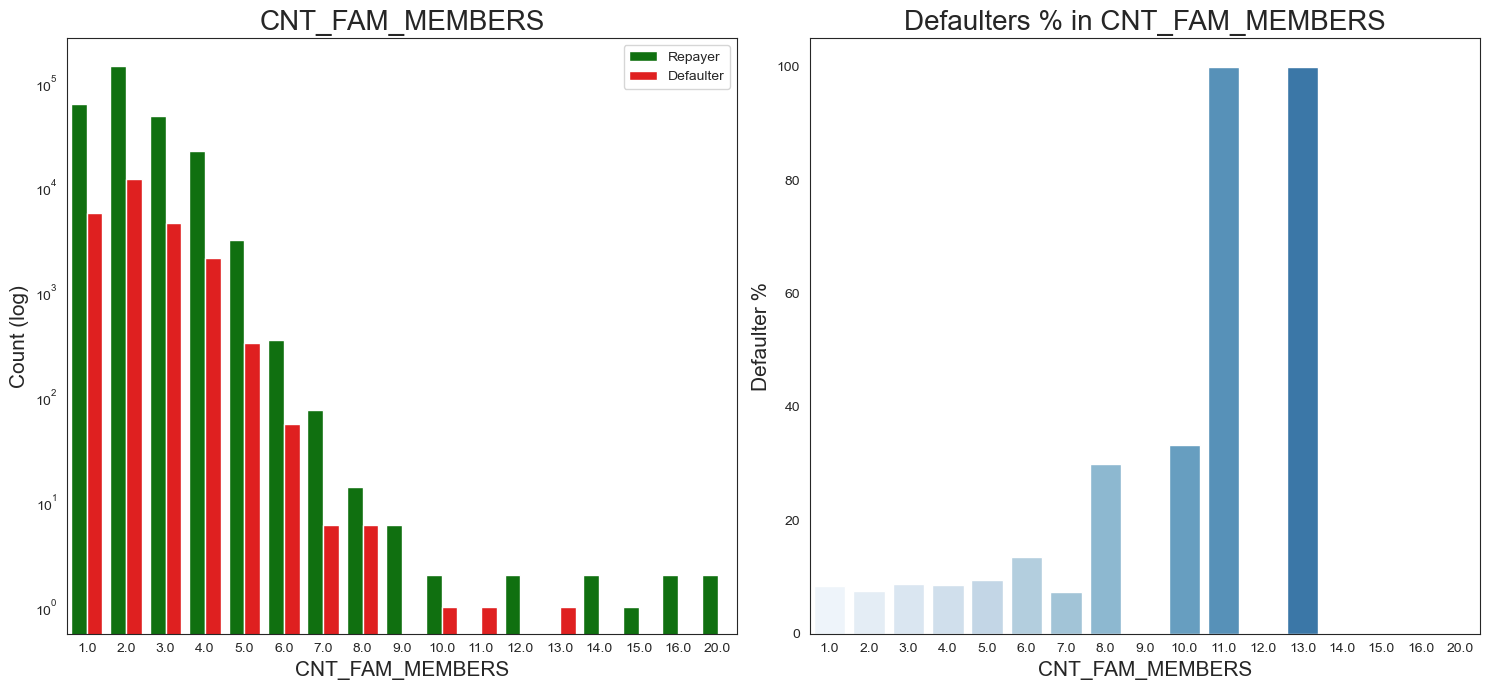

In [140]:
# Number of family members based on loan repayment status

univariate(inp_appl,"CNT_FAM_MEMBERS","TARGET",True,False,True) # Family Members Counts

- Default rate of family members is same upto 7 than it is gradually increasing defaulter rates.


### Numerical Variable Analysis

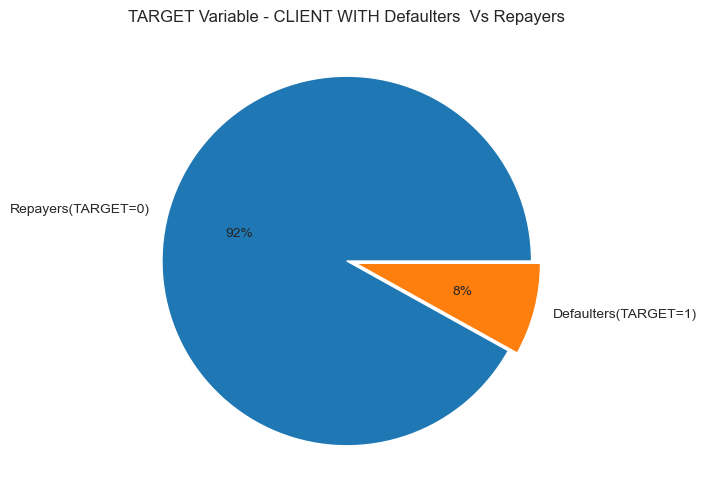

In [141]:
# ‘Target variable’ in the dataset ( clients with payment difficulties and all other cases)
fig = plt.figure(figsize=(13,6))
plt.pie(inp_appl['TARGET'].value_counts(normalize=True)*100,labels=['Repayers(TARGET=0)','Defaulters(TARGET=1)'],explode=(0,0.05),autopct='%1.f%%')
plt.title('TARGET Variable - CLIENT WITH Defaulters  Vs Repayers')
plt.show()

- 92% There is smooth client and rest of 8% client with payment difficulties.

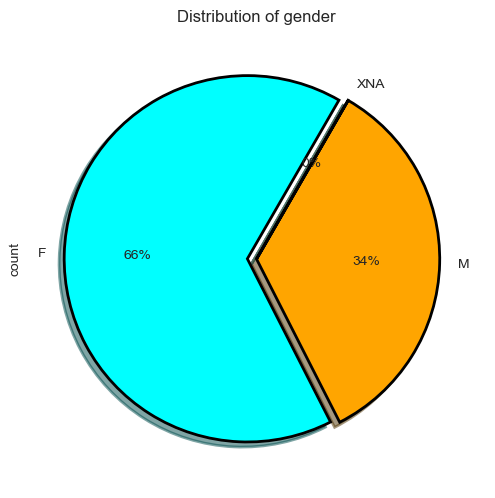

In [142]:
# Plotting the graph for gender of client:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
inp_appl["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["cyan","orange"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of gender")
plt.show()

- Female applicants are about 66% and male applicants are about 34%.

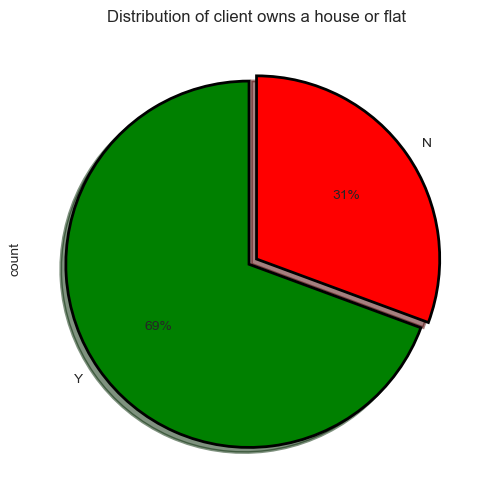

In [143]:
#Plotting the graph:

fig = plt.figure(figsize=(13,6))
plt.subplot(121)
inp_appl["FLAG_OWN_REALTY"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["green","red"],startangle = 90,
                                              wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[0.05,0],shadow =True)
plt.title("Distribution of client owns a house or flat")
plt.show()

- Distribution of client owning a house or flat is 69% which says that the loan clients have house or flat which can act as future security from the bank.*

In [144]:
# Checking all columns
inp_appl.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT

In [145]:
inp_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_REALTY              307511 non-null  category
 5   CNT_CHILDREN                 307511 non-null  category
 6   AMT_INCOME_TOTAL             307511 non-null  float64 
 7   AMT_CREDIT                   307511 non-null  float64 
 8   AMT_ANNUITY                  307499 non-null  float64 
 9   AMT_GOODS_PRICE              307233 non-null  float64 
 10  NAME_TYPE_SUITE              306219 non-null  category
 11  NAME_INCOME_TYPE             307511 non-null  category
 12  NAME_EDUCATION_TYPE          307511 non-null

In [146]:
# Creating correlation columns in the list

Corre_col = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [147]:
# Checking new dataframe based on Target 0 and 1 for correlation
# Repayers dataframe
Repayer_ad = inp_appl.loc[inp_appl['TARGET']==0, Corre_col]

In [148]:
# Checking Length of correlation column
print(len(Corre_col))

41


In [149]:
# Find top 10 correlation for the Repayers dataframe

# Select only numeric columns
corr_repayer = Repayer_ad.select_dtypes(include=[np.number]).corr()

# Generate upper triangle mask to avoid duplicate correlations
corr_ad_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape), k=1).astype(bool)).unstack().reset_index()

# Rename columns for clarity
corr_ad_repayer.columns = ['VAR1', 'VAR2', 'Correlation']

# Drop NaN values
corr_ad_repayer.dropna(subset=["Correlation"], inplace=True)

# Convert correlation values to absolute to find top correlations
corr_ad_repayer["Correlation"] = corr_ad_repayer["Correlation"].abs()

# Sort by correlation in descending order and display top 10 correlations
corr_ad_repayer.sort_values(by='Correlation', ascending=False, inplace=True)

# Display top 10 correlations
corr_ad_repayer.head(10)


VAR1              VAR2  Correlation
64     AMT_GOODS_PRICE        AMT_CREDIT     0.987250
65     AMT_GOODS_PRICE       AMT_ANNUITY     0.776686
43         AMT_ANNUITY        AMT_CREDIT     0.771309
131      DAYS_EMPLOYED        DAYS_BIRTH     0.626114
42         AMT_ANNUITY  AMT_INCOME_TOTAL     0.418953
63     AMT_GOODS_PRICE  AMT_INCOME_TOTAL     0.349462
21          AMT_CREDIT  AMT_INCOME_TOTAL     0.342799
152  DAYS_REGISTRATION        DAYS_BIRTH     0.333151
174    DAYS_ID_PUBLISH     DAYS_EMPLOYED     0.276663
173    DAYS_ID_PUBLISH        DAYS_BIRTH     0.271314

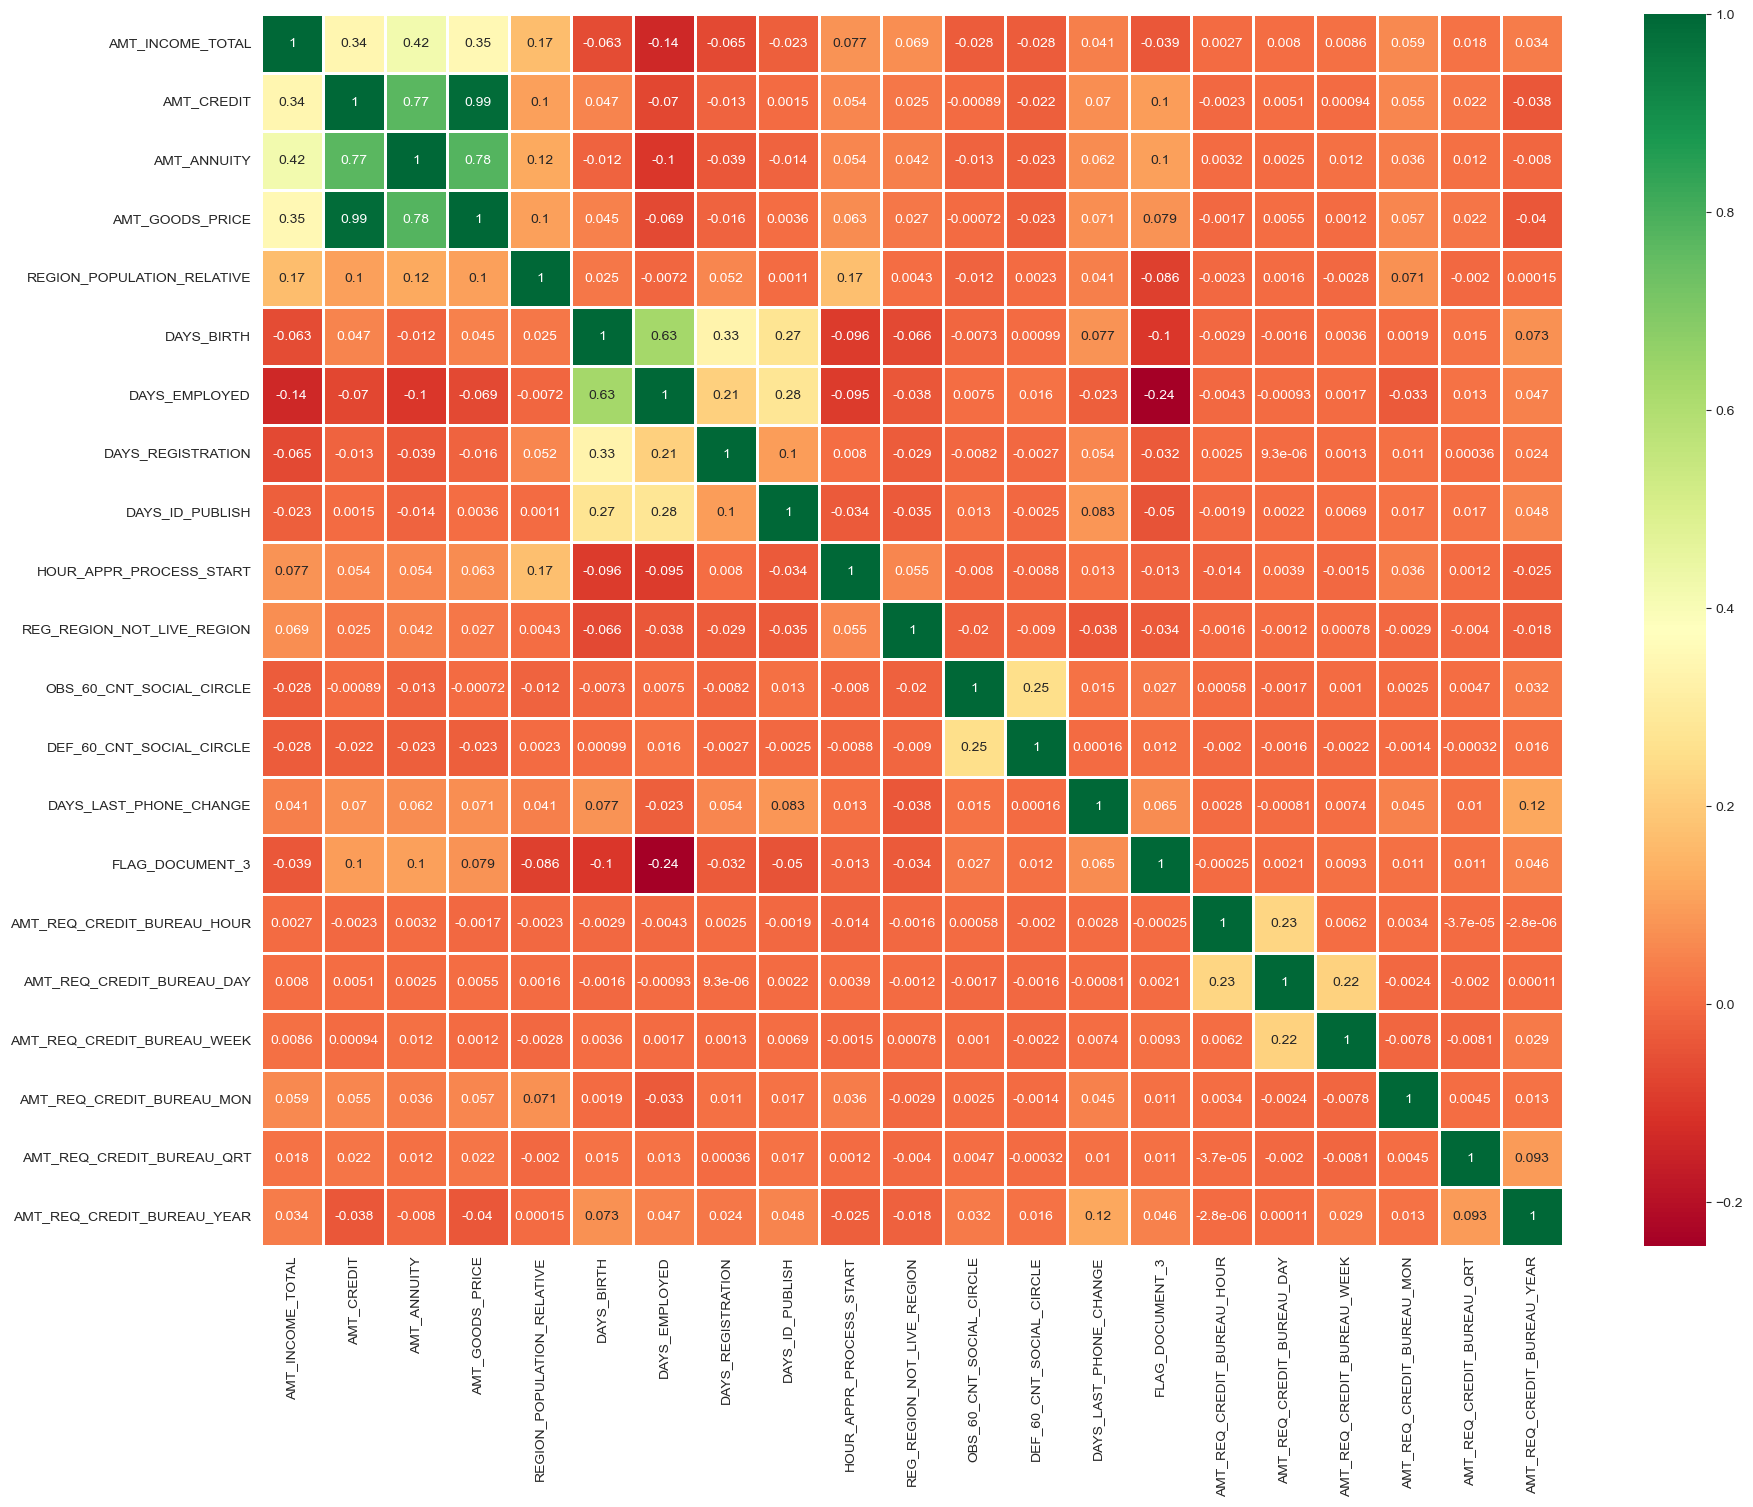

In [150]:
# Plotting a head to check correlation amount Repayers

# Select only numeric columns to calculate correlation
numeric_cols = Repayer_ad.select_dtypes(include=[np.number])

# Plot heatmap with numeric columns only
fig = plt.figure(figsize=(21, 16))
ax = sns.heatmap(numeric_cols.corr(), annot=True, linewidths=1, cmap="RdYlGn")
plt.show()


### Credit Amount is highly correlated with
- Goods Price Amount
- Loan Annuity
- Total Income
- 
**High Correlation in number of DAYS_EMPLOYED**

In [151]:
# Defaulters dataframe
Defaulter_ad = inp_appl.loc[inp_appl['TARGET']==1, Corre_col]

In [152]:
# Finding top 10 correlation for the Defaulter data
# Select only numeric columns from Defaulter_ad
numeric_cols = Defaulter_ad.select_dtypes(include=[np.number])

# Calculate correlation only for numeric columns
corr_Defaulter = numeric_cols.corr()

# Extract upper triangle of the correlation matrix
corr_ad_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape), k=1).astype(bool)).unstack().reset_index()

# Rename columns
corr_ad_Defaulter.columns = ['VAR1', 'VAR2', 'Correlation']

# Drop rows where correlation is NaN
corr_ad_Defaulter.dropna(subset=["Correlation"], inplace=True)

# Take absolute values for correlation
corr_ad_Defaulter["Correlation"] = corr_ad_Defaulter["Correlation"].abs()

# Sort values by correlation in descending order
corr_ad_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)

# Display the top 10 correlations
corr_ad_Defaulter.head(10)


VAR1                        VAR2  Correlation
64             AMT_GOODS_PRICE                  AMT_CREDIT     0.983103
65             AMT_GOODS_PRICE                 AMT_ANNUITY     0.752699
43                 AMT_ANNUITY                  AMT_CREDIT     0.752195
131              DAYS_EMPLOYED                  DAYS_BIRTH     0.582185
152          DAYS_REGISTRATION                  DAYS_BIRTH     0.289114
300            FLAG_DOCUMENT_3               DAYS_EMPLOYED     0.272169
263   DEF_60_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE     0.264159
173            DAYS_ID_PUBLISH                  DAYS_BIRTH     0.252863
351  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR     0.247511
174            DAYS_ID_PUBLISH               DAYS_EMPLOYED     0.229090

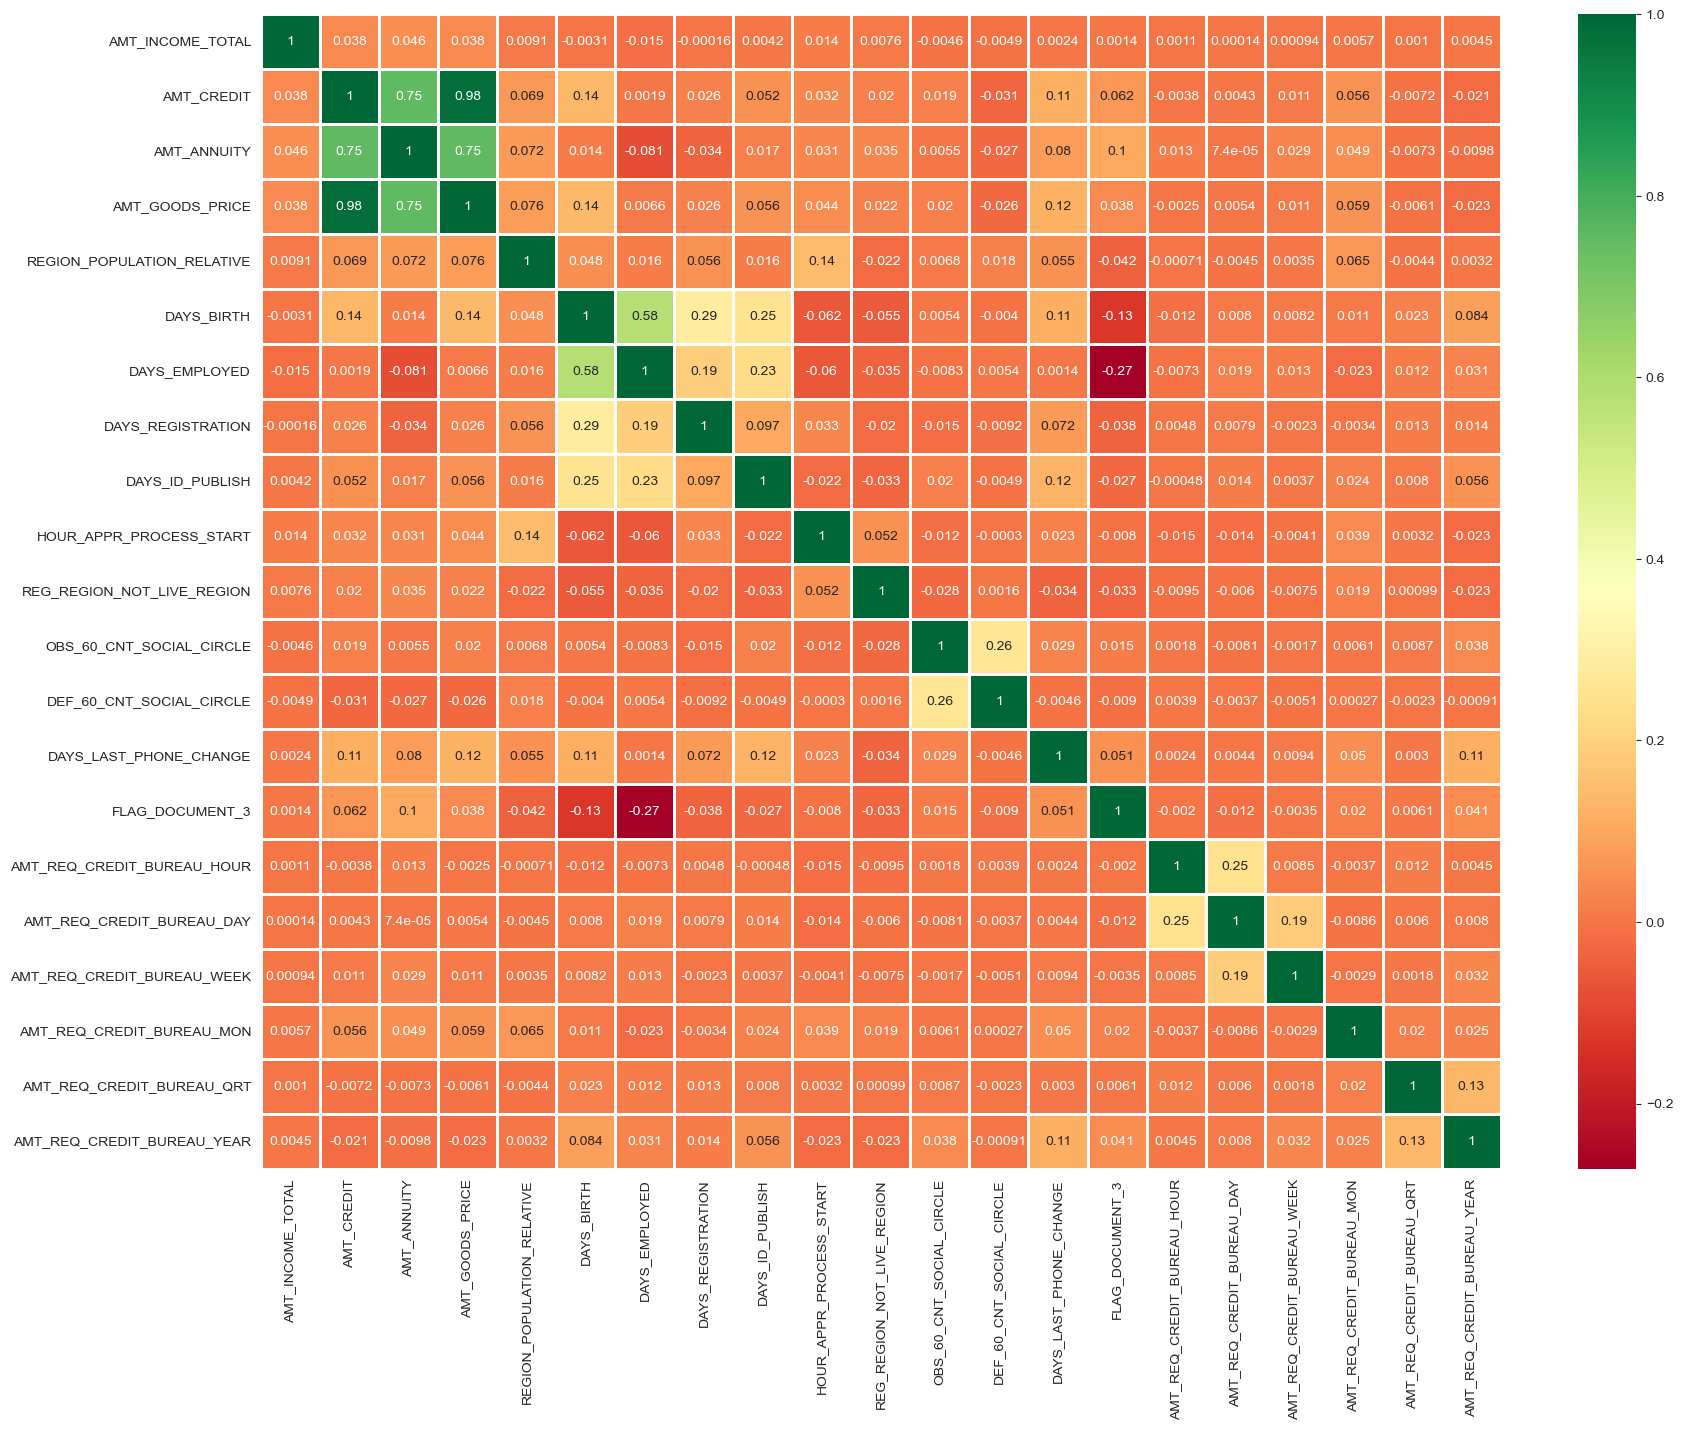

In [153]:
# Select only numeric columns from Defaulter_ad
numeric_cols = Defaulter_ad.select_dtypes(include=[np.number])

# Create correlation matrix only for numeric columns
corr_Defaulter = numeric_cols.corr()

# Plot heatmap with corrected data
fig = plt.figure(figsize=(20, 15))
ax = sns.heatmap(corr_Defaulter, cmap="RdYlGn", annot=True, linewidths=1)
plt.show()


### Correlation comparison between repayers and defaulters

- Credit Amount is highly correlation in defaulters as well as repayers with good price amount.
- Loan Annuity slightly reduced in defaulters 0.75 as compare to repayers 0.77.
- High Correlation in repayers days employed 0.63 as compared to defaulters 0.58.
- Drop in correlation between total income of the client and the credit amount 0.038 amongst defaulters other it is 0.342 among repayers.
- Days_birth and number of children correlation has reduced to 0.259 in defaulters when compared to 0.337 in repayers.

###  Numerical Univariate Analysis

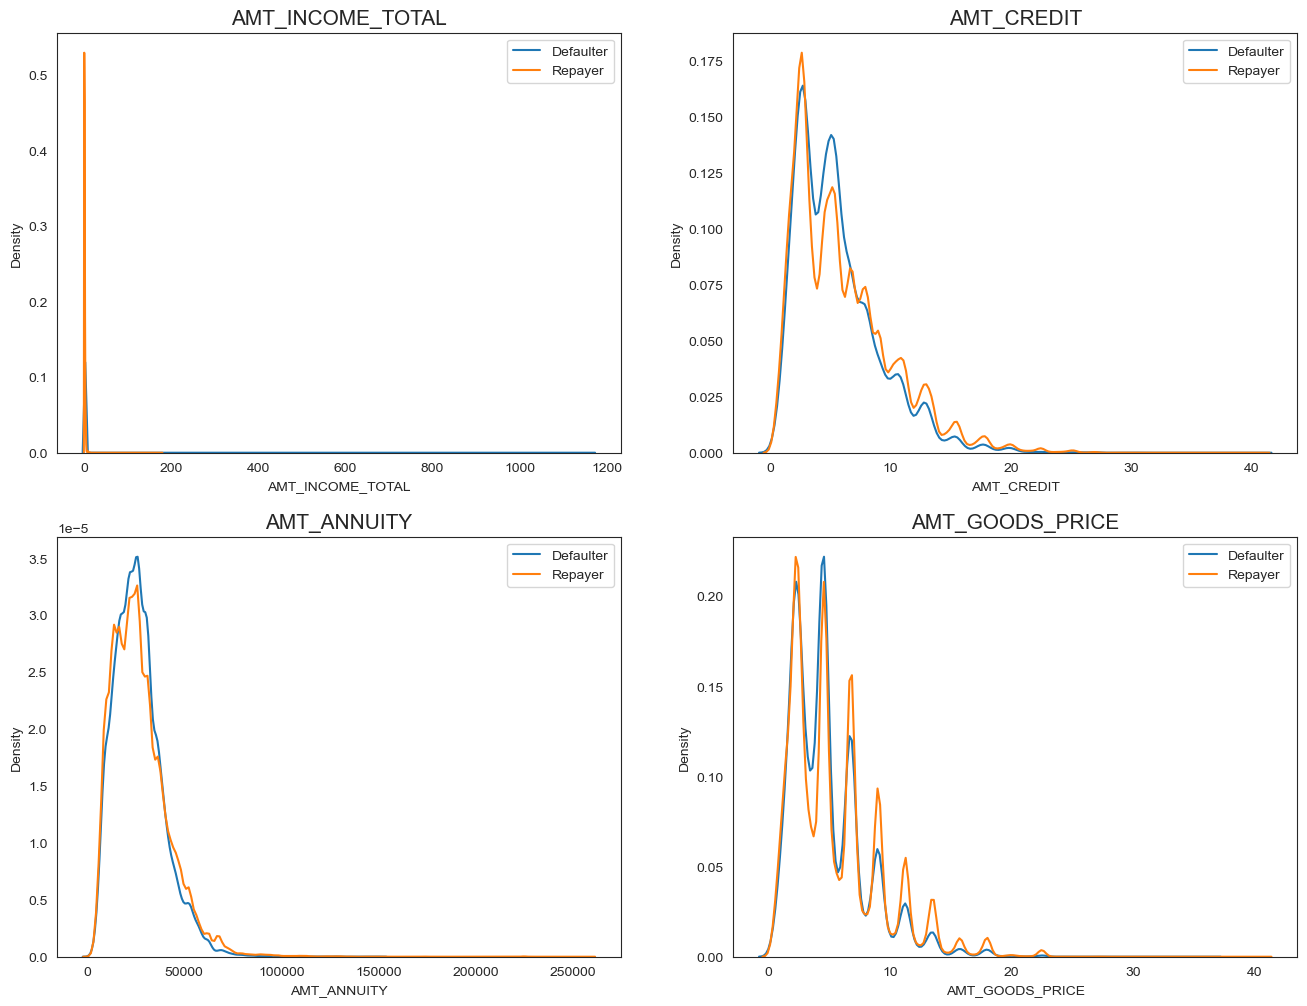

In [191]:
# Plotting the numerical columns related to amount as distribution plot to see density
numerical_data = inp_appl[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(numerical_data):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_ad[i[1]], hist=False,label ="Defaulter")
    sns.distplot(Repayer_ad[i[1]], hist=False, label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5})
    plt.legend()
plt.show()

* Most no of loans are given for goods price below 10 lakhs.
* Most people pay annuity below 50K for the credit loan.
* Credit amount of the loan is mostly less then 10 lakhs.

### Numerical Bivariate Analysis

<Figure size 1500x1500 with 0 Axes>

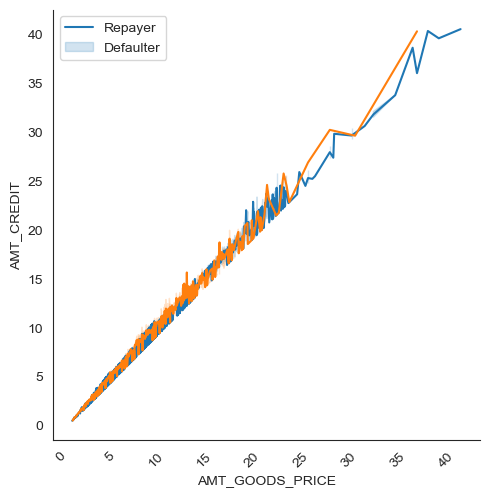

In [155]:
# Checking the relationship between Goods price and credit and comparing with loan repayment status

bivariate_n('AMT_GOODS_PRICE','AMT_CREDIT',inp_appl,"TARGET", "line",['Repayer','Defaulter'])

- There is increase in defaulter when credit amount goes beyond 30 Lakhs.

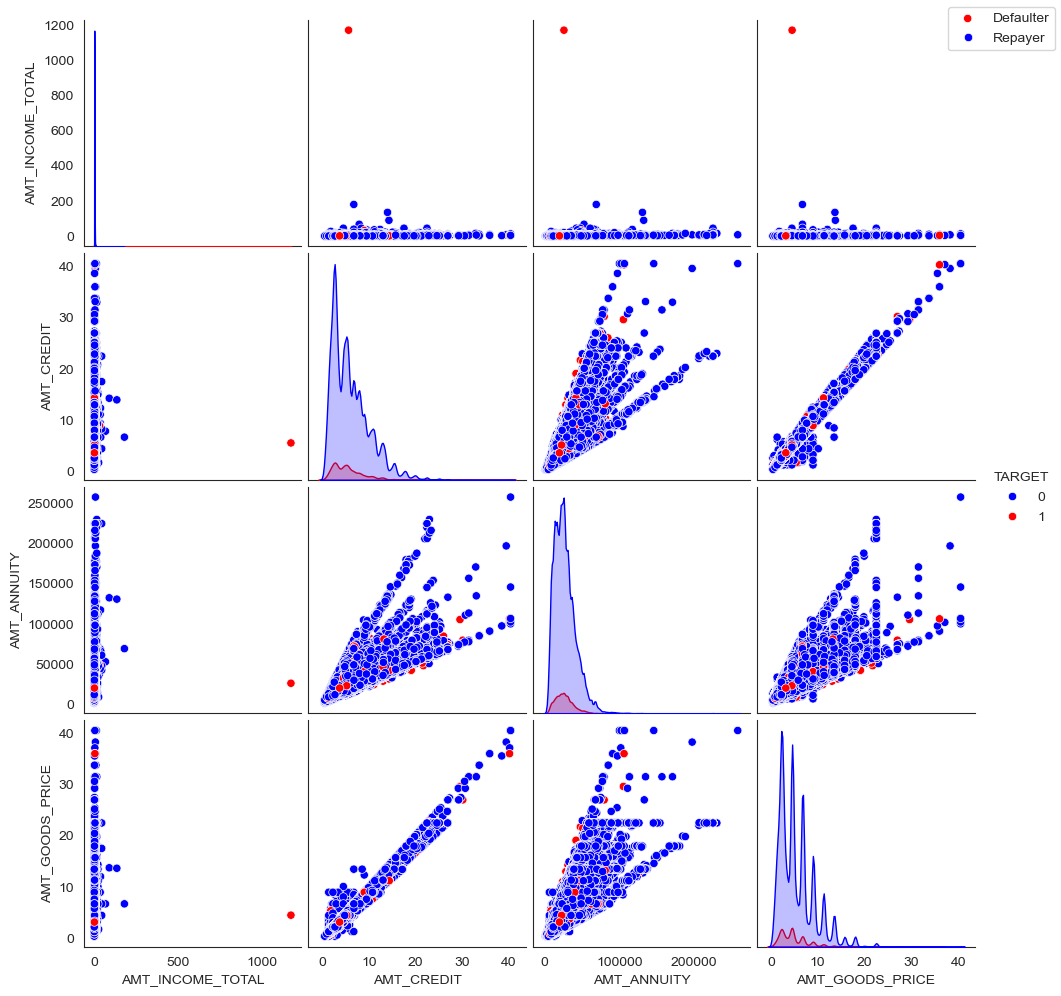

In [156]:
# ploting Pairplot amount_n against loan repayment status

amount_n = inp_appl[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount_n = amount_n[(amount_n["AMT_GOODS_PRICE"].notnull()) & (amount_n["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount_n,hue="TARGET",palette=["b","r"])
ax.fig.legend(labels=['Defaulter','Repayer'])
plt.show()


- Loan Amount and Goods price are highly correlated as based on the scatterplot.
- There are very less defaulters for Loan Amount >20 Lakhs.
- When Annuity Amount > 15K and Good Price Amount > 20 Lakhs, there is a lesser chance of defaulters.

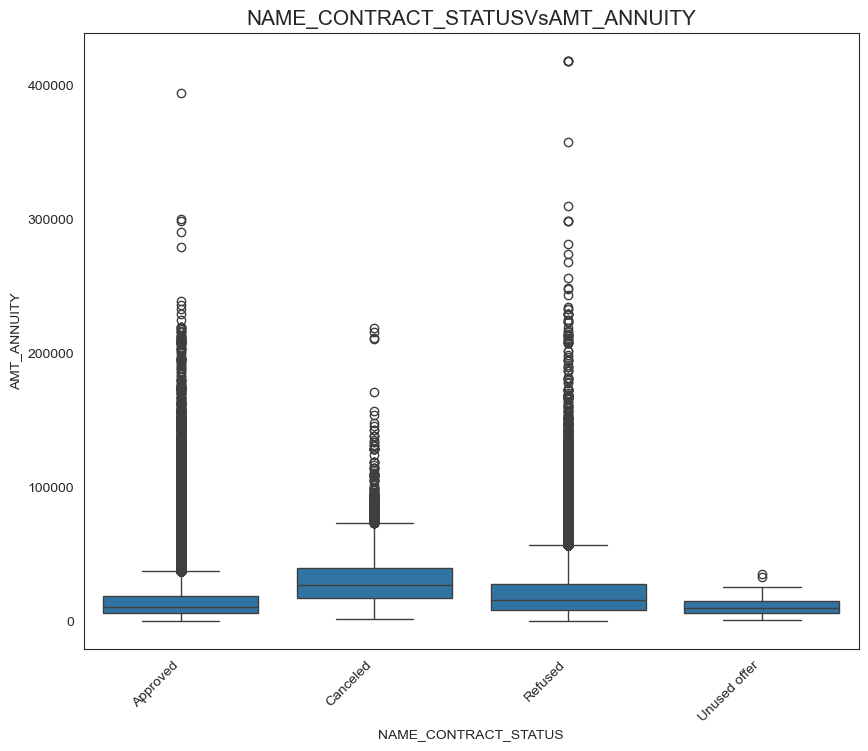

In [157]:
# Using boxplot to do some more bivariate analysis on categorical vs numeric columns

fig,ax = plt.subplots(1,1,figsize=(10,8))
sns.boxplot(x='NAME_CONTRACT_STATUS',y = 'AMT_ANNUITY', data=prev_appl)
ax.set_ylabel('AMT_ANNUITY')
ax.set_xlabel('NAME_CONTRACT_STATUS')
ax.set_title( 'NAME_CONTRACT_STATUS' 'Vs''AMT_ANNUITY' ,fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
     
plt.show()

### Merged Dataframes Analysis

In [159]:
# Merge application data and previous data with inner joins
merge_loan = pd.merge(inp_appl, prev_appl, how='inner', on='SK_ID_CURR')
merge_loan.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL OCCUPATION_TYPE CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_RANGE AMT_CREDIT_RANGE AMT_GOODS_PRICE_RANGE  AGE_IN_YEARS AGE_GROUP  YEAR_EMPLOYED EMPLOYEMENT_YEARS  SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE_y NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL YEARLY_DECISION
0      100002       1           Cash loans           M               Y            0             2.025      4.065975        24700.5              3.510     Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801        9461            637             3648.0             2120           1        Laborers             1.0                    2                           2                  WEDNESDAY                       10                           0                          0                           0                      0                      0                       0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                  1134.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0            2L-3L            4L-5L                 3L-4L         25.92     25-30           1.75               0-5     1038818       Consumer loans       9251.775         179055.0      179055.0           179055.0                    XAP             Approved            606                    XNA                XAP           Unknown              New              Vehicles            POS               XNA                    Stone               500       Auto technology         24.0       low_normal      POS other with interest            365243.0           565.0                      125.0           25.0              17.0                        0.0               2
1      100003       0           Cash loans           F               N            0             2.700     12.935025        35698.5             11.295            Family    State servant               Higher education               Married  House / apartment                    0.003541       16765           1188             1186.0              291           1      Core staff             2.0                    1                           1                     MONDAY                       11                           0                          0                           0                      0                      0                       0                  School                       1.0                  

In [160]:
# Checking number of columns and rows
merge_loan.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL OCCUPATION_TYPE CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_RANGE AMT_CREDIT_RANGE AMT_GOODS_PRICE_RANGE  AGE_IN_YEARS AGE_GROUP  YEAR_EMPLOYED EMPLOYEMENT_YEARS  SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE_y NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL YEARLY_DECISION
0      100002       1           Cash loans           M               Y            0             2.025      4.065975        24700.5              3.510     Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801        9461            637             3648.0             2120           1        Laborers             1.0                    2                           2                  WEDNESDAY                       10                           0                          0                           0                      0                      0                       0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                  1134.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0            2L-3L            4L-5L                 3L-4L         25.92     25-30           1.75               0-5     1038818       Consumer loans       9251.775         179055.0      179055.0           179055.0                    XAP             Approved            606                    XNA                XAP           Unknown              New              Vehicles            POS               XNA                    Stone               500       Auto technology         24.0       low_normal      POS other with interest            365243.0           565.0                      125.0           25.0              17.0                        0.0               2
1      100003       0           Cash loans           F               N            0             2.700     12.935025        35698.5             11.295            Family    State servant               Higher education               Married  House / apartment                    0.003541       16765           1188             1186.0              291           1      Core staff             2.0                    1                           1                     MONDAY                       11                           0                          0                           0                      0                      0                       0                  School                       1.0                  

In [161]:
# Checking datatype of merge_loan
merge_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 82 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_REALTY              1413701 non-null  category
 5   CNT_CHILDREN                 1413701 non-null  category
 6   AMT_INCOME_TOTAL             1413701 non-null  float64 
 7   AMT_CREDIT_x                 1413701 non-null  float64 
 8   AMT_ANNUITY_x                1413608 non-null  float64 
 9   AMT_GOODS_PRICE_x            1412493 non-null  float64 
 10  NAME_TYPE_SUITE_x            1410175 non-null  category
 11  NAME_INCOME_TYPE             1413701 non-null  category
 12  NAME_EDUCATION_TYPE         

In [162]:
# Creating merge_loan dataframe based on Target value 0 and 1 for correlation

L0 = merge_loan[merge_loan['TARGET']==0] # Repayers
L1 = merge_loan[merge_loan['TARGET']==1] # Defaulters

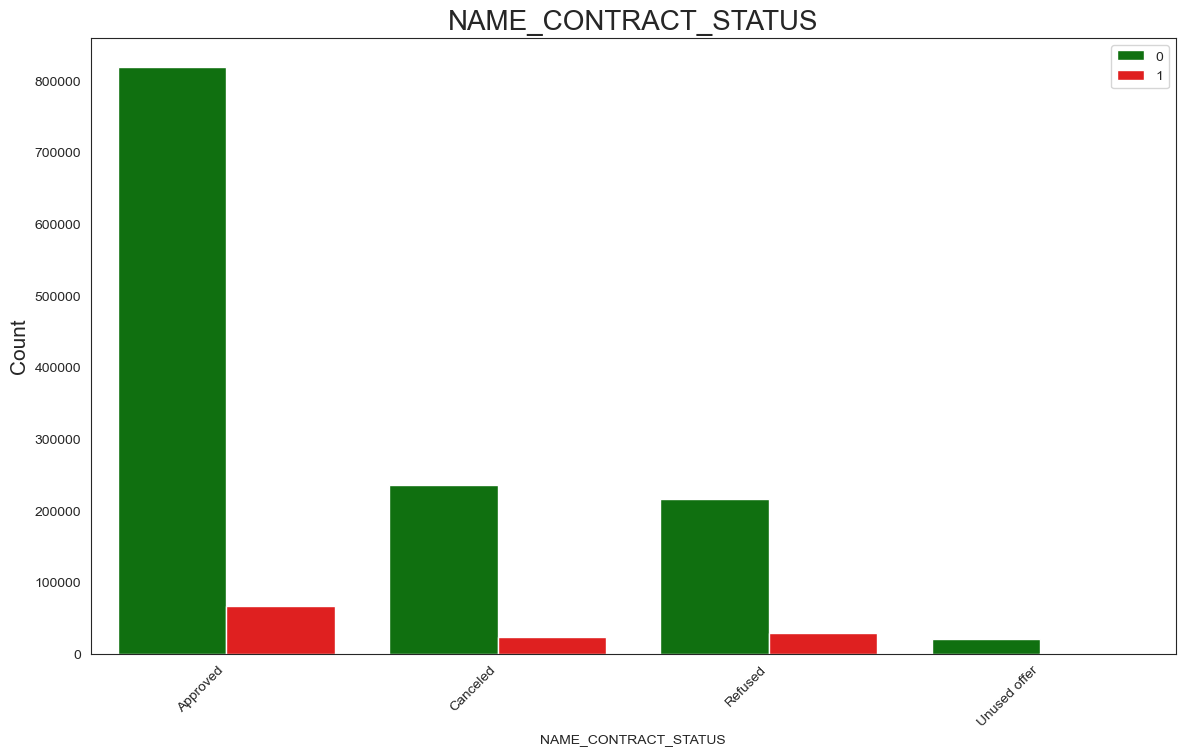

Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%

In [163]:
# Check status Contract Status based on loan repayment status and analysis where it is business loss and financial loss

univariate_c_merged("NAME_CONTRACT_STATUS",merge_loan,"TARGET",['g','r'],False,(14,8))
r = merge_loan.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([r.value_counts(),round(r.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%"
df1

* 90% of the previously canceled client have actually repaid the loan. Revising the interest rates would increase business opportunity for these clients.
* 88% of the clients who have been previously refused a loan has paid back the loan in current case.
* Refusal reason should be recorded for further analysis as these clients could turn into potential repaying customer.

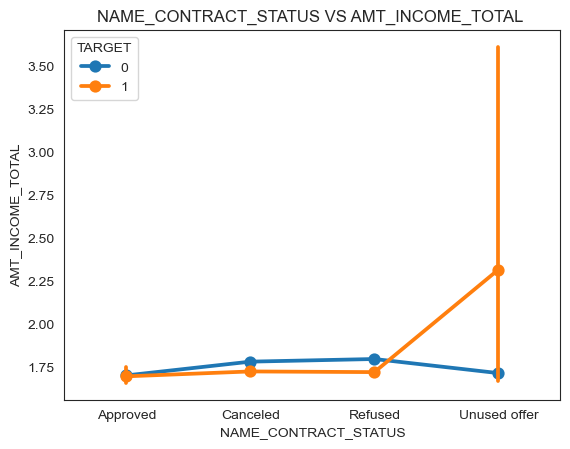

In [168]:
# plotting the relationship between income total and contract status

sns.pointplot(data = merge_loan,hue = "TARGET", x = "NAME_CONTRACT_STATUS", y = 'AMT_INCOME_TOTAL')
plt.title('NAME_CONTRACT_STATUS VS AMT_INCOME_TOTAL ')
plt.show()

- The point plot shows that the people who have not used offer earlier have defaulter even when their average income is higher than others.

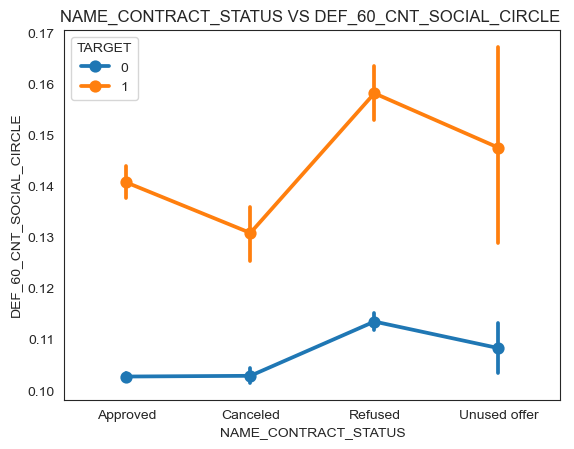

In [169]:
# plotting the relationship between people who defaulted in last 60 days being in client's social circle and contact status

sns.pointplot(data = merge_loan,hue = "TARGET", x = "NAME_CONTRACT_STATUS", y = 'DEF_60_CNT_SOCIAL_CIRCLE')
plt.title('NAME_CONTRACT_STATUS VS DEF_60_CNT_SOCIAL_CIRCLE ')
plt.show()

- Clients who have average of 0.13 or higher their DEF_60_CNT_SOCIAL_CIRCLE score tend to default more and those analysing client's social circle could help in disbursement of the loan.

# Summary

### Recommended group where loan amount will be credited to bank

- Customers who are 50 years of age or older.
- Customers who have worked for more than 40 years.
- Customers that earn more than 7 lakhs a year and have advanced degrees.
- Students and professionals in business.
- Customers who reside in office apartments.
- Customers who reside in a region with a rating of one.




###  Risky group

- Individuals who are single or in a civil marriage.
- Individuals having secondary and lower secondary schooling.
- Clients who are either at Maternity leave or Unemployed.
- People who live in region rating equal to 3.
- Low-skill Labouers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.
- Young folks who are in age group of 20-40. 
- People who have less than 5 years of employment.
- Client who have children equal to or greater than 9.




# *Conclusion*
In essence, "Default Detective" transforms raw data into actionable intelligence, enabling companies to navigate the delicate balance between seizing business opportunities and minimizing financial risks through a systematic and insightful EDA approach using Python.







